In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="n_jobs value 1 overridden to 1 by setting random_state.")
warnings.filterwarnings("ignore", message="MiniBatchKMeans is known to have a memory leak on Windows with MKL")

from sklearn.utils.multiclass import unique_labels


import time
import os
os.environ["OMP_NUM_THREADS"] = "2"

from scipy import stats
from scipy.stats import *
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import umap


In [2]:
df_genomica_oc = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\all_ct_genomic_feat_puliti.xlsx", header=0)

In [3]:
df_genomica_hy = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\hy_genomics_feat.xlsx", header=0)

In [4]:
df_genomica_la = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\la_genomics_feat.xlsx", header=0)

In [5]:
df_genomica_op = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\op_genomics_feat.xlsx", header=0)

In [138]:
combined_dataset_r = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_407_pazienti_recidiva_dummy.csv", index_col=0)


In [10]:
combined_dataset_r

,0,1,2,3,4,5,6,7,8,9,...,risk_Additional_precancerous_lesion_1,risk_Alcohol_at_Time_of_Diagnosis,risk_Family_History_of_Malignancies,risk_Oral_Hygiene,risk_Smoker_at_Time_of_Diagnosis,Recurrence_Tumor,Recurrence_Alive,Recurrence_Dead,Status_Alive,Status_Dead
SS_UDUS148,2.892422,-0.226992,-0.625910,-0.449340,0.243863,-0.305467,-0.815560,-0.383943,2.061886,-0.710926,...,No,Current,No,Good,Current,1,0,1,0,1
SS_INT_MI_0045,1.181239,-0.407873,-0.937577,-0.645136,-0.280964,-0.198198,-0.623065,-0.595476,1.815780,-0.518228,...,No,Never,Yes,Intermediate,Never,1,0,1,0,1
SS_INT_MI_0103,0.965505,-0.586660,-0.771575,-0.793989,-0.211227,-0.659505,-0.726747,-0.480194,2.002150,0.024120,...,No,Never,Unknown,Intermediate,Never,1,0,1,0,1
SS_INT_MI_0055,1.134780,-0.486895,-0.678935,-0.662932,0.366618,-0.721611,-0.780290,-0.454888,2.196336,-0.204169,...,No,Never,Unknown,Intermediate,Current,1,0,1,0,1
SS_INT_0064,0.771911,0.307021,0.029719,-0.557509,0.584324,-0.435170,-1.242609,0.307021,1.383607,-0.418858,...,No,Never,No,Good,Never,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,0.253040,0.395856,-0.603859,-0.889491,0.931418,0.717193,-1.139420,-0.425338,1.152783,-0.139705,...,No,Current,Unknown,Good,Current,1,0,1,0,1
SS_VUMC_HPL_3711,0.522150,-0.411490,-1.003724,-1.010691,0.250419,0.027460,-0.996756,0.306158,1.149221,-0.947984,...,No,Never,No,Not available,Current,1,0,1,0,1
SS_VUMC_HPL_8612,0.575902,-0.827952,-0.930258,-0.856371,0.109845,-0.503986,-0.566506,-0.310743,1.087428,0.053009,...,No,Current,Unknown,Poor,Current,1,0,1,0,1
SS_VUMC_HPL_4174,0.116059,-0.461632,-0.766827,-0.968474,-0.031089,-0.461632,-0.717778,-0.423483,1.058893,0.361304,...,No,Current,Yes,Not available,Former,1,1,0,1,0


In [11]:
#COLONNE PAZIENTI CON RECIDIVA CHE NON HANNO MISSING VALUES E SU CUI SI PUO' CALCOLARE L'ARS
col_for_ari_recurrence = ['Unnamed: 0', 'Patient_ID', 'Study_Name', 'Study_OID',
       'Study_Start_Date', 'clinical_Age_at_Diagnosis',
       'clinical_Date_of_first_Diagnosis', 'clinical_Hospital', 'clinical_Sex',
       'ctn_Anatomical_Tumor_Location', 'ctn_Laterality_of_T',
       'ctn_Stage_at_Diagnosis_7Edition', 'ctn_TNM_cN_7Edition',
       'ctn_TNM_cT_7Edition', 'ctn_Tumor_Region',
       'follow_Date_of_Examination_or_Last_Contact',
       'follow_Date_of_Recurrence', 'follow_Follow_Up_Period',
       'follow_Recurrence', 'follow_Status_of_Patient',
       'follow_Treatment_of_Recurrence', 'follow_Type_of_Recurrence',
       'patho_HPV_Status_Evaluated', 'patient_Consent',
       'patient_Eligibility_Criteria', 'risk_Additional_precancerous_lesion_1',
       'risk_Alcohol_at_Time_of_Diagnosis',
       'risk_Family_History_of_Malignancies', 'risk_Oral_Hygiene',
       'risk_Smoker_at_Time_of_Diagnosis', 'Recurrence_Tumor',
       'Recurrence_Alive', 'Recurrence_Dead', 'Status_Alive', 'Status_Dead']

In [6]:
df_genomica_hy = df_genomica_hy.drop(columns = 'Unnamed: 0.1')
df_genomica_op = df_genomica_op.drop(columns = 'Unnamed: 0.1')
df_genomica_la = df_genomica_la.drop(columns = 'Unnamed: 0.1')
df_genomica_hy = df_genomica_hy.drop(columns=['Unnamed: 0'])
df_genomica_la = df_genomica_la.drop(columns=['Unnamed: 0'])
df_genomica_op = df_genomica_op.drop(columns=['Unnamed: 0'])


In [11]:
df_genomica_op.T

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
SS_INT_MI_0205,5.22,4.69,4.84,3.25,4.54,4.15,3.54,4.32,8.31,3.86,...,5.26,3.23,3.70,5.45,3.96,4.27,4.00,4.75,3.27,3.26
SS_INT_MI_0203,5.97,4.63,5.26,3.80,4.85,5.05,3.93,4.89,8.58,4.27,...,4.95,3.57,3.54,3.59,3.75,3.69,4.03,4.64,3.42,3.59
SS_INT_MI_0015,7.24,3.89,4.69,3.56,4.61,4.66,3.43,4.21,11.47,4.36,...,5.38,4.02,3.37,4.39,3.97,3.36,3.91,4.43,3.22,3.08
SS_INT_0226,6.13,3.73,4.07,3.43,4.62,5.14,3.42,4.10,8.37,4.49,...,5.59,3.83,3.04,3.74,3.85,4.45,5.53,4.53,3.86,3.39
SS_INT_0028,5.72,4.39,3.73,3.85,4.67,4.97,3.86,5.10,8.21,4.53,...,5.69,4.02,3.55,4.19,3.79,4.05,3.92,4.06,3.66,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_INT_0412,5.02,3.23,3.69,3.44,4.48,4.40,3.67,4.49,8.27,4.22,...,5.31,3.17,3.82,3.73,3.44,3.43,6.09,4.51,3.57,3.20
SS_INT_MI_0223,5.42,4.28,3.78,3.62,4.82,3.95,3.36,4.20,7.34,3.54,...,5.64,3.61,3.35,3.86,4.23,3.56,4.31,4.60,3.22,2.97
SS_VUMC_OP_2720,5.32,3.92,3.11,2.79,4.38,3.59,3.64,3.97,7.58,3.59,...,5.39,3.06,3.59,3.16,3.66,3.44,3.13,4.32,3.92,3.73
SS_INT_0279,5.06,3.89,3.47,3.25,3.71,4.27,3.39,3.95,8.00,3.77,...,5.40,3.72,4.23,3.89,3.42,3.68,3.34,4.69,3.14,2.97


In [8]:
doc = df_genomica_oc.T
dla = df_genomica_la.T
dhy = df_genomica_hy.T
dop = df_genomica_op.T


In [9]:
combined_dataset = pd.concat([dla, dhy, dop, doc], ignore_index=False)
combined_dataset.index[1]


'SS_INT_0468'

In [17]:
combined_dataset

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
SS_INT_MI_0224,6.24,4.11,3.58,3.53,4.97,5.00,3.38,4.77,8.15,4.80,...,5.31,3.19,3.01,3.04,4.34,3.55,4.46,4.54,4.81,3.66
SS_INT_0468,6.29,3.99,4.32,3.99,4.81,4.30,3.70,4.48,7.56,4.73,...,5.98,3.03,3.05,4.09,4.04,3.98,4.30,4.61,3.73,2.79
SS_INT_0079,5.63,3.85,3.70,4.43,4.76,5.23,3.74,5.06,7.23,4.00,...,5.41,3.93,2.91,4.55,3.52,3.69,4.91,4.84,3.67,4.08
SS_INT_0174,5.50,4.33,3.63,3.98,4.85,4.83,3.50,5.27,6.09,4.46,...,5.69,3.41,3.12,4.07,5.20,3.70,4.12,5.00,3.32,3.31
SS_INT_MI_0038,6.14,4.15,3.87,4.77,5.33,5.64,3.66,4.36,6.99,4.41,...,5.85,4.65,3.59,3.80,4.00,4.10,4.22,4.86,4.31,3.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_SBA_0058,6.64,4.47,3.25,4.15,3.65,3.77,3.34,3.80,6.49,3.69,...,4.93,3.61,3.43,3.58,4.18,3.61,5.01,4.45,4.36,3.23
SS_SBA_0061,5.78,4.32,3.26,4.18,4.77,5.23,3.35,3.95,5.51,4.28,...,5.22,3.69,3.60,3.79,3.37,3.53,4.60,4.57,3.93,3.82
SS_SBA_0067,6.04,3.64,3.21,3.36,4.68,3.80,3.44,3.81,6.98,4.84,...,6.23,4.03,3.34,3.94,3.54,3.32,4.60,4.76,3.74,3.40
SS_SBA0075,7.08,3.96,3.28,3.51,4.54,3.64,3.31,3.83,8.15,4.66,...,5.55,3.73,3.18,3.86,3.99,3.97,4.88,4.94,3.60,3.25


In [25]:
column_means = combined_dataset.mean()
column_stds = combined_dataset.std()
print(column_stds)

0        0.825105
1        0.487309
2        0.515687
3        0.487309
4        0.611353
           ...   
26899    0.293094
26900    0.582488
26901    0.365434
26902    0.564827
26903    0.431571
Length: 26904, dtype: float64


In [77]:
# Disabilita il troncamento per pandas
pd.set_option('display.max_seq_items', None)  # Mostra tutti gli elementi di un Index

# Stampa l'intero Index
print(column_stds.sort_values(ascending=False))

21590    4.378445
4112     4.339715
359      4.040097
4182     4.031108
4564     4.000205
           ...   
19935    0.203717
23262    0.203497
20456    0.193862
106      0.185554
23484    0.160732
Length: 26904, dtype: float64


In [79]:
mean_std_ratio = column_stds / column_means

# Ordina le colonne in base al rapporto media / deviazione standard (decrescente)
sorted_mean_std_ratio = mean_std_ratio.sort_values(ascending=False)
print(sorted_mean_std_ratio)

# print(sorted_mean_std_ratio)

4923     0.498754
5930     0.489857
17921    0.463875
3238     0.437773
4577     0.421519
           ...   
23122    0.040834
23376    0.039625
12474    0.036313
26096    0.035912
4070     0.032040
Length: 26904, dtype: float64


In [15]:
doc = df_genomica_oc.T
dla = df_genomica_la.T
dhy = df_genomica_hy.T
dop = df_genomica_op.T

dla['Type'] = 'la'
dhy['Type'] = 'hy'
dop['Type'] = 'op'
doc['Type'] = 'oc'

combined_dataset = pd.concat([dla, dhy, dop, doc], ignore_index=False)

In [16]:
combined_dataset

,0,1,2,3,4,5,6,7,8,9,...,26895,26896,26897,26898,26899,26900,26901,26902,26903,Type
SS_INT_MI_0224,6.24,4.11,3.58,3.53,4.97,5.00,3.38,4.77,8.15,4.80,...,3.19,3.01,3.04,4.34,3.55,4.46,4.54,4.81,3.66,la
SS_INT_0468,6.29,3.99,4.32,3.99,4.81,4.30,3.70,4.48,7.56,4.73,...,3.03,3.05,4.09,4.04,3.98,4.30,4.61,3.73,2.79,la
SS_INT_0079,5.63,3.85,3.70,4.43,4.76,5.23,3.74,5.06,7.23,4.00,...,3.93,2.91,4.55,3.52,3.69,4.91,4.84,3.67,4.08,la
SS_INT_0174,5.50,4.33,3.63,3.98,4.85,4.83,3.50,5.27,6.09,4.46,...,3.41,3.12,4.07,5.20,3.70,4.12,5.00,3.32,3.31,la
SS_INT_MI_0038,6.14,4.15,3.87,4.77,5.33,5.64,3.66,4.36,6.99,4.41,...,4.65,3.59,3.80,4.00,4.10,4.22,4.86,4.31,3.46,la
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_SBA_0058,6.64,4.47,3.25,4.15,3.65,3.77,3.34,3.80,6.49,3.69,...,3.61,3.43,3.58,4.18,3.61,5.01,4.45,4.36,3.23,oc
SS_SBA_0061,5.78,4.32,3.26,4.18,4.77,5.23,3.35,3.95,5.51,4.28,...,3.69,3.60,3.79,3.37,3.53,4.60,4.57,3.93,3.82,oc
SS_SBA_0067,6.04,3.64,3.21,3.36,4.68,3.80,3.44,3.81,6.98,4.84,...,4.03,3.34,3.94,3.54,3.32,4.60,4.76,3.74,3.40,oc
SS_SBA0075,7.08,3.96,3.28,3.51,4.54,3.64,3.31,3.83,8.15,4.66,...,3.73,3.18,3.86,3.99,3.97,4.88,4.94,3.60,3.25,oc


In [17]:
doc

,0,1,2,3,4,5,6,7,8,9,...,26895,26896,26897,26898,26899,26900,26901,26902,26903,Type
SS_INT_0519,4.51,3.28,2.95,3.50,4.51,4.60,3.19,3.94,8.33,4.55,...,4.33,3.62,3.65,3.60,3.66,3.62,4.41,2.84,3.54,oc
SS_INT_0035,5.25,4.20,2.96,3.67,3.86,5.01,3.65,4.36,7.42,3.19,...,3.48,3.48,3.09,3.80,3.73,4.23,4.34,3.25,3.31,oc
SS_PR126,4.61,3.88,4.05,4.41,5.16,3.79,3.21,4.49,5.83,3.81,...,3.56,4.25,4.23,4.81,3.42,3.68,3.98,3.96,3.48,oc
SS_305,5.13,4.61,3.72,4.06,5.05,5.13,3.88,5.90,5.93,3.53,...,3.14,2.72,4.12,2.95,3.20,5.09,4.23,3.86,3.92,oc
SS_145,4.88,4.51,3.89,4.28,5.55,4.82,3.67,4.22,6.56,4.20,...,3.04,3.86,3.96,4.47,3.43,4.25,4.08,3.13,4.05,oc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_SBA_0058,6.64,4.47,3.25,4.15,3.65,3.77,3.34,3.80,6.49,3.69,...,3.61,3.43,3.58,4.18,3.61,5.01,4.45,4.36,3.23,oc
SS_SBA_0061,5.78,4.32,3.26,4.18,4.77,5.23,3.35,3.95,5.51,4.28,...,3.69,3.60,3.79,3.37,3.53,4.60,4.57,3.93,3.82,oc
SS_SBA_0067,6.04,3.64,3.21,3.36,4.68,3.80,3.44,3.81,6.98,4.84,...,4.03,3.34,3.94,3.54,3.32,4.60,4.76,3.74,3.40,oc
SS_SBA0075,7.08,3.96,3.28,3.51,4.54,3.64,3.31,3.83,8.15,4.66,...,3.73,3.18,3.86,3.99,3.97,4.88,4.94,3.60,3.25,oc


In [17]:
scaler = StandardScaler()
# APPLICO LA STANDARDIZATION Z-SCORE
df_oc = scaler.fit_transform(df_genomica_oc)
df_op = scaler.fit_transform(df_genomica_op)
df_la = scaler.fit_transform(df_genomica_la)
df_hy = scaler.fit_transform(df_genomica_hy)

df_oc = pd.DataFrame(df_oc, columns=df_genomica_oc.columns)
df_op = pd.DataFrame(df_op, columns=df_genomica_op.columns)
df_la = pd.DataFrame(df_la, columns=df_genomica_la.columns)
df_hy = pd.DataFrame(df_hy, columns=df_genomica_hy.columns)



In [ ]:
df_oc.T

In [61]:
Cluster_2 = ['SS_INT_0519', 'SS_INT_0035', 'SS_PR126', 'SS_305', 'SS_145', 'SS_PR131', 'SS_PR132', 'SS_PR133', 'SS_PR136', 'SS_PR139', 'SS_NPR125', 'SS_PR150', 'SS_PR151', 'SS_PR153', 'SS_PR154', 'SS_PR156', 'SS_PR157', 'SS_PR142', 'SS_PR161', 'SS_PR146', 'SS_PR147', 'SS_PR149', 'SS_INT_MI_0005', 'SS_INT_MI_0026', 'SS_INT_MI_0051', 'SS_INT_MI_0049', 'SS_INT_0351', 'SS_INT_MI_0086', 'SS_INT_MI_0091', 'SS_INT_MI_0087', 'SS_INT_0040', 'SS_INT_0469', 'SS_INT_MI_0243', 'SS_VUMC_013', 'SS_VUMC_137', 'SS_VUMC_034', 'SS_INT_MI_0093', 'SS_VUMC_045', 'SS_253', 'SS_VUMC_047', 'SS_VUMC051', 'SS_VUMC_116', 'SS_VUMC_032', 'SS_VUMC_144', 'SS_VUMC_166', 'SS_251', 'SS_VUMC_OC_2995', 'SS_VUMC_OC_8718', 'SS_INT_MI_0108', 'SS_INT_MI_0112', 'SS_VUMC_OC_6946', 'SS_INT_0535', 'SS_173', 'SS_174', 'SS_175', 'SS_177', 'SS_295', 'SS_91', 'SS_227', 'SS_228', 'SS_231', 'SS_233', 'SS_254', 'SS_257', 'SS_155', 'SS_160', 'SS_158', 'SS_150', 'SS_166', 'SS_172', 'SS_184', 'SS_302', 'SS_268', 'SS_269', 'SS_276', 'SS_258', 'SS_278', 'SS_287', 'SS_308', 'SS_PR135', 'SS_PR152', 'SS_PR158', 'SS_PR164', 'SS_PR148', 'SS_INT_0383', 'SS_INT_MI_0125', 'SS_INT_MI_0100', 'SS_INT_MI_0153', 'SS_INT_MI_0191', 'SS_INT_MI_0241', 'SS_INT_MI_0041', 'SS_INT_MI_0233', 'SS_INT_MI_0183', 'SS_INT_0408', 'SS_INT_0394', 'SS_INT_MI_0092', 'SS_INT_MI_0215', 'SS_INT_0316', 'SS_INT_MI_0235', 'SS_INT_0419', 'SS_INT_MI_0211', 'SS_INT_MI_0221', 'SS_INT_0415', 'SS_VUMC_020', 'SS_VUMC_040', 'SS_VUMC_064', 'SS_VUMC_066', 'SS_VUMC_077', 'SS_VUMC_164', 'SS_VUMC_094', 'SS_VUMC_096', 'SS_VUMC_097', 'SS_VUMC_101', 'SS_VUMC_108', 'SS_VUMC_110', 'SS_VUMC_129', 'SS_VUMC_138', 'SS_VUMC_OC_8821', 'SS_VUMC_088', 'SS_VUMC_175', 'SS_VUMC_186', 'SS_VUMC_205', 'SS_VUMC_OC_3383', 'SS_VUMC_OC_8033', 'SS_VUMC_OC_8224', 'SS_INT_0246', 'SS_VUMC_202', 'SS_VUMC_021', 'SS_VUMC_107', 'SS_VUMC_199', 'SS_VUMC_010', 'SS_VUMC_209', 'SS_VUMC_218', 'SS_VUMC_OC_4275', 'SS_VUMC_OC_7770', 'SS_VUMC_OC_1860', 'SS_VUMC_OC_6758', 'SS_VUMC_015', 'SS_VUMC_OC_2676', 'SS_VUMC_OC_4196', 'SS_VUMC_OC_8636', 'SS_VUMC_OC_1896', 'SS_VUMC_OC_6494', 'SS_VUMC_147', 'SS_VUMC_OC_7878', 'SS_VUMC_OC_3744', 'SS_VUMC_OC_8600', 'SS_301', 'SS_VUMC_OC_5735', 'SS_VUMC_OC_6796', 'SS_VUMC_OC_8211', 'SS_296', 'SS_VUMC_OC_993', 'SS_VUMC_OC_9291', 'SS_VUMC_OC_4142', 'SS_VUMC_OC_2801', 'SS_VUMC_OC_9984', 'SS_VUMC_OC_6666', 'SS_UDUS64', 'SS_UDUS16', 'SS_UDUS102', 'SS_UDUS67', 'SS_UDUS4', 'SS_UDUS78', 'SS_UDUS97', 'SS_UDUS26', 'SS_307', 'SS_PR134', 'SS_328', 'SS_181', 'SS_PR127', 'SS_325', 'SS_148', 'SS_226', 'SS_149', 'SS_163', 'SS_169', 'SS_94', 'SS_97', 'SS_103', 'SS_90_8014', 'SS_134', 'SS_PR128', 'SS_99', 'SS_232', 'SS_298', 'SS_297', 'SS_INT_MI_0006', 'SS_INT_MI_0107', 'SS_INT_0113', 'SS_INT_0155', 'SS_INT_MI_0060', 'SS_INT_MI_0185', 'SS_INT_MI_0142', 'SS_INT_0355', 'SS_INT_MI_0117', 'SS_INT_MI_0009', 'SS_INT_MI_0230', 'SS_INT_MI_0218', 'SS_INT_0490', 'SS_UDUS84', 'SS_MAASTRO_192', 'SS_MAASTRO_91', 'SS_MAASTRO_3946', 'SS_MAASTRO_609', 'SS_MAASTRO_759', 'SS_MAASTRO_9241', 'SS_MAASTRO_2835', 'SS_INT_0414', 'SS_159', 'SS_299', 'SS_PR130', 'SS_INT_0123', 'SS_INT_0367', 'SS_INT_0085', 'SS_VUMC_OC_2798', 'SS_UDUS58', 'SS_UDUS80', 'SS_UDUS112', 'SS_VUMC_OC_5849', 'SS_VUMC_062', 'SS_VUMC_221', 'SS_VUMC_OC_8745', 'SS_INT_0014', 'SS_INT_MI_0167', 'SS_INT_0139', 'SS_INT_0488', 'SS_VUMC_068', 'SS_VUMC_OC_3961', 'SS_INT_0336', 'SS_VUMC_OC_7559', 'SS_VUMC_162', 'SS_VUMC_173', 'SS_VUMC_196', 'SS_VUMC_011', 'SS_VUMC_119', 'SS_INT_0304', 'SS_INT_0317', 'SS_INT_0470', 'SS_INT_0477', 'SS_INT_0497', 'SS_INT_0389', 'SS_INT_0202', 'SS_INT_0084', 'SS_INT_0424', 'SS_INT_0374', 'SS_AOP_PR19_5068', 'SS_INT_MI_0103', 'SS_INT_MI_0045', 'SS_INT_0173', 'SS_INT_MI_0055', 'SS_INT_MI_0094', 'SS_INT_0121', 'SS_INT_0064', 'SS_INT_0073', 'SS_INT_0148', 'SS_INT_0016', 'SS_INT_0132', 'SS_INT_0147', 'SS_INT_0227', 'SS_INT_0022', 'SS_INT_0200', 'SS_INT_0069', 'SS_INT_0247', 'SS_AOP_PR22_6843', 'SS_AOP_PR18_1530', 'SS_AOP_PR18_2160', 'SS_AOP_PR18_5090', 'SS_AOP_PR20', 'SS_AOP_PR18_5601', 'SS_AOP_PR17_5877', 'SS_AOP_PR18_8337', 'SS_AOP_PR18_4023', 'SS_AOP_PR19_2030', 'SS_AOP_PR19_8999', 'SS_AOP_PRX6', 'SS_AOP_PRX2', 'SS_AOP_PR17', 'SS_AOP_PR17_6541', 'SS_AOP_PR18_5300', 'SS_AOP_PR17_450', 'SS_AOP_PR16', 'SS_AOP_PR_A_6546', 'SS_AOP_PR_A_133', 'SS_AOP_PR20_1501', 'SS_AOP_PR19_3731', 'SS_AOP_PR21', 'SS_AOP_PR21_8230', 'SS_AOP_PR21_7343', 'SS_AOP_PR21_9812', 'SS_AOP_PR21_9888', 'SS_AOP_PR18_2013', 'SS_AOP_PR20_9224', 'SS_AOP_PR19_6965', 'SS_AOP_PR20_777', 'SS_AOP_PR19_9503', 'SS_INT_0531', 'SS_INT_0114', 'SS_INT_0182', 'SS_INT_0237', 'SS_INT_0238', 'SS_INT_0253', 'SS_INT_0105', 'SS_INT_0043', 'SS_INT_0165', 'SS_INT_0157', 'SS_INT_0136', 'SS_AOP_PR20_8948', 'SS_AOP_PR20_3802', 'SS_AOP_PR20_8665', 'SS_AOP_PR19_3106', 'SS_AOP_PR17_4626', 'SS_AOP_PRX8', 'SS_AOP_PRX7', 'SS_AOP_PR20_597', 'SS_AOP_PR20_7499', 'SS_AOP_PRX4', 'SS_AOP_PR17_3965', 'SS_AOP_PR_A_1043', 'SS_AOP_PR21_122', 'SS_AOP_PR21_2063', 'SS_AOP_PR22', 'SS_AOP_PR_A_9391', 'SS_AOP_PR22_1154', 'SS_AOP_PR22_4170', 'SS_AOP_PR16_9745', 'SS_AOP_PR_A_7388', 'SS_UDUS136', 'SS_UDUS144', 'SS_UDUS148', 'SS_UDUS152', 'SS_UDUS155', 'SS_INT_0302', 'SS_INT_0272', 'SS_INT_0269', 'SS_INT_0328', 'SS_INT_0309', 'SS_INT_0327', 'SS_INT_0321', 'SS_INT_0356', 'SS_AOP_PR17_8437', 'SS_INT_0533', 'SS_INT_0530', 'SS_INT_0473', 'SS_INT_0526', 'SS_INT_0039', 'SS_INT_0532', 'SS_INT_0527', 'SS_INT_0529', 'SS_SBA_0050', 'SS_SBA0055', 'SS_SBA_085', 'SS_SBA_0088', 'SS_SBA_0091', 'SS_SBA_0092', 'SS_SBA_0093', 'SS_SBA_0002', 'SS_SBA0044', 'SS_SBA0045', 'SS_SBA_0058', 'SS_SBA_0061', 'SS_SBA_0067', 'SS_SBA0075', 'SS_SBA0078']
Cluster_0 = ['SS_INT_MI_0205', 'SS_INT_MI_0203', 'SS_INT_MI_0015', 'SS_INT_0226', 'SS_INT_0028', 'SS_INT_0115', 'SS_INT_0030', 'SS_INT_0023', 'SS_INT_0299', 'SS_INT_0149', 'SS_INT_0249', 'SS_UDUS114', 'SS_INT_0081', 'SS_INT_0010', 'SS_INT_0161', 'SS_INT_0150', 'SS_INT_0054', 'SS_INT_0004', 'SS_INT_0163', 'SS_INT_0109', 'SS_INT_0078', 'SS_INT_0012', 'SS_INT_0029', 'SS_INT_0220', 'SS_INT_0003', 'SS_INT_0187', 'SS_MAASTRO_5588', 'SS_MAASTRO_8664', 'SS_MAASTRO_588', 'SS_MAASTRO_7205', 'SS_MAASTRO_1750', 'SS_MAASTRO_9171', 'SS_MAASTRO_4864', 'SS_MAASTRO_29', 'SS_MAASTRO_9580', 'SS_MAASTRO_1618', 'SS_MAASTRO_9627', 'SS_INT_0435', 'SS_MAASTRO_8050', 'SS_INT_0175', 'SS_INT_0242', 'SS_UDUS117', 'SS_MAASTRO_3171', 'SS_UDUS121', 'SS_UDUS123', 'SS_UDUS124', 'SS_UDUS126', 'SS_UDUS130', 'SS_UDUS149', 'SS_UDUS161', 'SS_UDUS162', 'SS_UDUS163', 'SS_INT_0347', 'SS_INT_0033', 'SS_MAASTRO_8873', 'SS_INT_0305', 'SS_MAASTRO_3831', 'SS_UDUS118', 'SS_MAASTRO_3190', 'SS_MAASTRO_4749', 'SS_MAASTRO_9564', 'SS_MAASTRO_5054', 'SS_MAASTRO_5978', 'SS_MAASTRO_7174', 'SS_MAASTRO_8625', 'SS_MAASTRO_5855', 'SS_MAASTRO_6952', 'SS_INT_0196', 'SS_INT_0323', 'SS_INT_0315', 'SS_INT_0292', 'SS_INT_0297', 'SS_INT_0296', 'SS_INT_0154', 'SS_MAASTRO_411', 'SS_INT_0460', 'SS_MAASTRO_1336', 'SS_MAASTRO_9595', 'SS_MAASTRO_4064', 'SS_UL0001', 'SS_UL0002', 'SS_UL0005', 'SS_UL0010', 'SS_UL0011', 'SS_UL0012', 'SS_UL0013', 'SS_UL0014', 'SS_UL0017', 'SS_UL0018', 'SS_INT_0520', 'SS_INT_0320', 'SS_SBA0037', 'SS_SBA_0007', 'SS_INT_0361', 'SS_INT_0197', 'SS_INT_0266', 'SS_INT_0420', 'SS_INT_0002', 'SS_INT_0020', 'SS_INT_0402', 'SS_MAASTRO_7265', 'SS_MAASTRO_6607', 'SS_MAASTRO_3130', 'SS_UDUS140', 'SS_MAASTRO_7901', 'SS_MAASTRO_9245', 'SS_MAASTRO_472', 'SS_MAASTRO_5082', 'SS_SBA_0090', 'SS_UDUS115', 'SS_UDUS131', 'SS_UDUS133', 'SS_UDUS156', 'SS_UDUS138', 'SS_UDUS143', 'SS_UDUS145', 'SS_UDUS147', 'SS_MAASTRO_2270', 'SS_MAASTRO_3469', 'SS_INT_0413', 'SS_SBA0080', 'SS_MAASTRO_8441', 'SS_INT_0311', 'SS_INT_0124', 'SS_MAASTRO_5530', 'SS_MAASTRO_6905', 'SS_UL0004', 'SS_UL0019', 'SS_INT_0255', 'SS_SBA_0017', 'SS_SBA_0003', 'SS_SBA0042', 'SS_SBA0039', 'SS_INT_0042', 'SS_INT_0521', 'SS_INT_MI_0059', 'SS_INT_0288', 'SS_INT_MI_0007', 'SS_INT_MI_0013', 'SS_INT_MI_0062', 'SS_INT_MI_0001', 'SS_176', 'SS_INT_MI_0130', 'SS_INT_MI_0141', 'SS_INT_MI_0097', 'SS_INT_MI_0122', 'SS_INT_MI_0229', 'SS_INT_MI_0171', 'SS_INT_MI_0201', 'SS_VUMC_OP_3483', 'SS_INT_MI_0152', 'SS_UDUS55', 'SS_UDUS105', 'SS_327', 'SS_178', 'SS_309', 'SS_93_9405', 'SS_146', 'SS_300', 'SS_UDUS76', 'SS_UDUS25', 'SS_UDUS29', 'SS_UDUS74', 'SS_UDUS43', 'SS_UDUS51', 'SS_UDUS30', 'SS_UDUS71', 'SS_MAASTRO_1125', 'SS_MAASTRO_6123', 'SS_MAASTRO_2765', 'SS_MAASTRO_4574', 'SS_MAASTRO_3880', 'SS_MAASTRO_6636', 'SS_VUMC_OP_1439', 'SS_MAASTRO_9654', 'SS_MAASTRO_9108', 'SS_MAASTRO_8424', 'SS_331', 'SS_UDUS20', 'SS_UDUS66', 'SS_UDUS59', 'SS_UDUS61', 'SS_UDUS81', 'SS_UDUS89', 'SS_UDUS113', 'SS_INT_0181', 'SS_MAASTRO_3788', 'SS_MAASTRO_7974', 'SS_MAASTRO_664', 'SS_MAASTRO_8033', 'SS_MAASTRO_5959', 'SS_MAASTRO_4423', 'SS_MAASTRO_4514', 'SS_MAASTRO_6009', 'SS_MAASTRO_1666', 'SS_MAASTRO_6486', 'SS_MAASTRO_8927', 'SS_MAASTRO_8275', 'SS_MAASTRO_4475', 'SS_MAASTRO_6790', 'SS_MAASTRO_9917', 'SS_MAASTRO_962', 'SS_MAASTRO_1291', 'SS_INT_0190', 'SS_INT_0065', 'SS_INT_0278', 'SS_INT_0271', 'SS_MAASTRO_1983', 'SS_MAASTRO_6474', 'SS_MAASTRO_4269', 'SS_MAASTRO_4919', 'SS_MAASTRO_4801', 'SS_MAASTRO_4257', 'SS_MAASTRO_2048', 'SS_MAASTRO_7906', 'SS_MAASTRO_7773', 'SS_MAASTRO_3180', 'SS_MAASTRO_2984', 'SS_MAASTRO_7444', 'SS_MAASTRO_3775', 'SS_MAASTRO_7812', 'SS_MAASTRO_5370', 'SS_MAASTRO_3375', 'SS_VUMC_OP_2824', 'SS_VUMC_OP_2718', 'SS_MAASTRO_5458', 'SS_VUMC_OP_8271', 'SS_VUMC_OP_8721', 'SS_VUMC_OP_2071', 'SS_MAASTRO_53813', 'SS_MAASTRO_9583', 'SS_MAASTRO_1110', 'SS_INT_0276', 'SS_VUMC_OP_5132', 'SS_VUMC_OP_4534', 'SS_VUMC_OP_5625', 'SS_VUMC_OP_9850', 'SS_VUMC_OP_7374', 'SS_VUMC_OP_1742', 'SS_VUMC_OP_5763', 'SS_VUMC_OP_1567', 'SS_VUMC_OP_8234', 'SS_VUMC_OP_639', 'SS_VUMC_OP_6545', 'SS_VUMC_OP_7836', 'SS_VUMC_OP_189', 'SS_VUMC_OP_7892', 'SS_VUMC_OP_4547', 'SS_VUMC_OP_4052', 'SS_VUMC_OP_4053', 'SS_VUMC_OP_1605', 'SS_VUMC_OP_5278', 'SS_VUMC_OP_5490', 'SS_VUMC_OP_2240', 'SS_VUMC_OP_825', 'SS_VUMC_OP_2876', 'SS_VUMC_OP_2663', 'SS_VUMC_OP_5747', 'SS_VUMC_OP_983', 'SS_VUMC_OP_6450', 'SS_VUMC_OP_9325', 'SS_VUMC_OP_1135', 'SS_VUMC_OP_3673', 'SS_VUMC_OP_6170', 'SS_VUMC_OP_5476', 'SS_VUMC_OP_1079', 'SS_VUMC_OP_5152', 'SS_VUMC_OP_6646', 'SS_VUMC_OP_326', 'SS_VUMC_OP_7299', 'SS_INT_MI_0234', 'SS_VUMC_OP_2710', 'SS_VUMC_OP_7571', 'SS_VUMC_OP_5667', 'SS_VUMC_OP_7671', 'SS_VUMC_OP_62', 'SS_VUMC_OP_2375', 'SS_VUMC_OP_1074', 'SS_VUMC_OP_7452', 'SS_VUMC_OP_5579', 'SS_VUMC_OP_8820', 'SS_VUMC_OP_7233', 'SS_VUMC_OP_7800', 'SS_VUMC_OP_968', 'SS_VUMC_OP_9673', 'SS_VUMC_OP_5362', 'SS_VUMC_OP_540', 'SS_VUMC_OP_9515', 'SS_VUMC_OP_9433', 'SS_VUMC_OP_4253', 'SS_VUMC_OP_4707', 'SS_VUMC_OP_4667', 'SS_VUMC_OP_3384', 'SS_VUMC_OP_9963', 'SS_VUMC_OP_8929', 'SS_VUMC_OP_4170', 'SS_VUMC_OP_8135', 'SS_VUMC_OP_7574', 'SS_VUMC_OP_5423', 'SS_VUMC_OP_5431', 'SS_INT_0188', 'SS_INT_0330', 'SS_INT_MI_0027', 'SS_INT_0025', 'SS_INT_MI_0053', 'SS_INT_MI_0066', 'SS_INT_MI_0011', 'SS_INT_0021', 'SS_INT_MI_0072', 'SS_INT_0332', 'SS_INT_MI_0048', 'SS_INT_0046', 'SS_INT_MI_0070', 'SS_INT_MI_0096', 'SS_INT_0082', 'SS_INT_MI_0110', 'SS_INT_0378', 'SS_INT_MI_0140', 'SS_INT_0501', 'SS_VUMC_OP_518', 'SS_INT_MI_0222', 'SS_INT_MI_0151', 'SS_INT_MI_0159', 'SS_INT_MI_0195', 'SS_INT_MI_0209', 'SS_INT_MI_0189', 'SS_INT_MI_0208', 'SS_INT_MI_0206', 'SS_INT_MI_0204', 'SS_INT_0102', 'SS_UDUS10', 'SS_UDUS44', 'SS_UDUS32', 'SS_UDUS31', 'SS_INT_0177', 'SS_INT_0169', 'SS_153', 'SS_UDUS52', 'SS_UDUS46', 'SS_UDUS19', 'SS_UDUS36', 'SS_UDUS9', 'SS_UDUS50', 'SS_UDUS79', 'SS_UDUS47', 'SS_UDUS7', 'SS_UDUS28', 'SS_UDUS85', 'SS_UDUS12', 'SS_UDUS60', 'SS_UDUS82', 'SS_UDUS72', 'SS_MAASTRO_5473', 'SS_MAASTRO_4803', 'SS_MAASTRO_6938', 'SS_MAASTRO_2500', 'SS_MAASTRO_4904', 'SS_MAASTRO_9926', 'SS_MAASTRO_6085', 'SS_UDUS13', 'SS_UDUS14', 'SS_UDUS35', 'SS_UDUS57', 'SS_UDUS75', 'SS_UDUS98', 'SS_UDUS111', 'SS_MAASTRO_5546', 'SS_MAASTRO_3626', 'SS_MAASTRO_6611', 'SS_MAASTRO_2276', 'SS_MAASTRO_9835', 'SS_MAASTRO_8008', 'SS_INT_0239', 'SS_INT_0257', 'SS_INT_0019', 'SS_INT_0232', 'SS_INT_0265', 'SS_INT_0133', 'SS_INT_0245', 'SS_INT_0213', 'SS_INT_0268', 'SS_INT_0256', 'SS_INT_0250', 'SS_INT_0263', 'SS_MAASTRO_382', 'SS_MAASTRO_2137', 'SS_MAASTRO_3290', 'SS_MAASTRO_3005', 'SS_MAASTRO_2117', 'SS_MAASTRO_9131', 'SS_MAASTRO_1836', 'SS_MAASTRO_7020', 'SS_MAASTRO_3310', 'SS_MAASTRO_6617', 'SS_INT_0262', 'SS_INT_0074', 'SS_MAASTRO_8869', 'SS_MAASTRO_6848', 'SS_MAASTRO_3686', 'SS_VUMC_OP_4691', 'SS_MAASTRO_8243', 'SS_MAASTRO_1097', 'SS_MAASTRO_9484', 'SS_VUMC_OP_', 'SS_VUMC_OP_4556', 'SS_VUMC_OP_412', 'SS_VUMC_OP_2220', 'SS_VUMC_OP_1693', 'SS_VUMC_OP_4935', 'SS_VUMC_OP_4346', 'SS_VUMC_OP_592', 'SS_VUMC_OP_7466', 'SS_VUMC_OP_924', 'SS_VUMC_OP_9633', 'SS_VUMC_OP_234', 'SS_VUMC_OP_5037', 'SS_VUMC_OP_4535', 'SS_VUMC_OP_5345', 'SS_VUMC_OP_5024', 'SS_VUMC_OP_7373', 'SS_INT_0421', 'SS_MAASTRO_5127', 'SS_INT_0375', 'SS_VUMC_OP_3134', 'SS_VUMC_OP_9077', 'SS_VUMC_OP_6689', 'SS_VUMC_OP_6111', 'SS_VUMC_OP_159', 'SS_VUMC_OP_4069', 'SS_VUMC_OP_7250', 'SS_VUMC_OP_1177', 'SS_VUMC_OP_4687', 'SS_VUMC_OP_8143', 'SS_VUMC_OP_775', 'SS_VUMC_OP_9154', 'SS_VUMC_OP_7942', 'SS_VUMC_OP_4610', 'SS_VUMC_OP_8564', 'SS_VUMC_OP_6933', 'SS_VUMC_OP_394', 'SS_VUMC_OP_6186', 'SS_MAASTRO_2927', 'SS_INT_MI_0018', 'SS_INT_0063', 'SS_INT_0170', 'SS_VUMC_OP_1651', 'SS_VUMC_OP_8155', 'SS_VUMC_OP_9259', 'SS_VUMC_OP_6145', 'SS_VUMC_OP_6371', 'SS_VUMC_OP_6735', 'SS_VUMC_OP_2069', 'SS_VUMC_OP_9036', 'SS_VUMC_OP_3221', 'SS_VUMC_OP_6895', 'SS_VUMC_OP_6471', 'SS_VUMC_OP_4615', 'SS_VUMC_OP_7410', 'SS_VUMC_OP_7702', 'SS_VUMC_OP_3110', 'SS_INT_0307', 'SS_VUMC_OP_3149', 'SS_VUMC_OP_1062', 'SS_VUMC_OP_3100', 'SS_VUMC_OP_2899', 'SS_VUMC_OP_5712', 'SS_VUMC_OP_7387', 'SS_VUMC_OP_8182', 'SS_VUMC_OP_3103', 'SS_VUMC_OP_9957', 'SS_VUMC_OP_264', 'SS_INT_0300', 'SS_INT_0291', 'SS_INT_0312', 'SS_VUMC_OP_8325', 'SS_VUMC_OP_7756', 'SS_VUMC_OP_707', 'SS_VUMC_OP_6402', 'SS_VUMC_OP_702', 'SS_VUMC_OP_1122', 'SS_VUMC_OP_6197', 'SS_VUMC_OP_6390', 'SS_VUMC_OP_6756', 'SS_VUMC_OP_3931', 'SS_VUMC_OP_6273', 'SS_VUMC_OP_3209', 'SS_VUMC_OP_9573', 'SS_VUMC_OP_604', 'SS_VUMC_OP_9555', 'SS_VUMC_OP_1817', 'SS_VUMC_OP_6266', 'SS_INT_0412', 'SS_INT_MI_0223', 'SS_VUMC_OP_2720', 'SS_INT_0279', 'SS_VUMC_OP_3558']
Cluster_3 = ['SS_INT_0380', 'SS_INT_0037', 'SS_INT_0176', 'SS_INT_MI_0031', 'SS_INT_MI_0090', 'SS_INT_0075', 'SS_INT_MI_0118', 'SS_INT_MI_0135', 'SS_INT_MI_0225', 'SS_INT_0475', 'SS_INT_0322', 'SS_INT_MI_0076', 'SS_INT_0231', 'SS_INT_0507', 'SS_INT_0385', 'SS_INT_0401', 'SS_UDUS94', 'SS_MAASTRO_1971', 'SS_UDUS39', 'SS_UDUS17', 'SS_UDUS38', 'SS_UDUS11', 'SS_UDUS73', 'SS_INT_0216', 'SS_MAASTRO_5111', 'SS_MAASTRO_7151', 'SS_MAASTRO_5311', 'SS_MAASTRO_6279', 'SS_UDUS34', 'SS_UDUS45', 'SS_UDUS62', 'SS_UDUS87', 'SS_UDUS103', 'SS_MAASTRO_6917', 'SS_INT_0143', 'SS_MAASTRO_3943', 'SS_UDUS109', 'SS_MAASTRO_3897', 'SS_MAASTRO_6175', 'SS_MAASTRO_3670', 'SS_MAASTRO_2517', 'SS_MAASTRO_1018', 'SS_MAASTRO_7504', 'SS_MAASTRO_9366', 'SS_MAASTRO_3732', 'SS_MAASTRO_7325', 'SS_MAASTRO_6525', 'SS_MAASTRO_711', 'SS_MAASTRO_2931', 'SS_MAASTRO_8354', 'SS_MAASTRO_6168', 'SS_MAASTRO_9787', 'SS_MAASTRO_2009', 'SS_MAASTRO_7879', 'SS_MAASTRO_5900', 'SS_MAASTRO_4393', 'SS_MAASTRO_1706', 'SS_MAASTRO_238', 'SS_MAASTRO_9886', 'SS_INT_0080', 'SS_VUMC_HPL_6171', 'SS_VUMC_HPL_7716', 'SS_VUMC_HPL_8582', 'SS_VUMC_HPL_8838', 'SS_VUMC_HPL_596', 'SS_VUMC_HPL_259', 'SS_VUMC_HPL_1509', 'SS_VUMC_HPL_3901', 'SS_VUMC_HPL_4989', 'SS_VUMC_HPL_4078', 'SS_VUMC_HPL_6165', 'SS_VUMC_HPL_5917', 'SS_VUMC_HPL_3648', 'SS_VUMC_HPL_9826', 'SS_VUMC_HPL_598', 'SS_VUMC_HPL_9999', 'SS_VUMC_HPL_7569', 'SS_VUMC_HPL_7849', 'SS_VUMC_HPL_8699', 'SS_VUMC_HPL_3593', 'SS_VUMC_HPL_4427', 'SS_VUMC_HPL_8798', 'SS_VUMC_HPL_9181', 'SS_VUMC_HPL_3990', 'SS_VUMC_HPL_1693', 'SS_VUMC_HPL_7952', 'SS_VUMC_HPL_5812', 'SS_VUMC_HPL_1422', 'SS_VUMC_HPL_8889', 'SS_VUMC_HPL_7244', 'SS_VUMC_HPL_1808', 'SS_VUMC_HPL_2485', 'SS_VUMC_HPL_6747', 'SS_VUMC_HPL_167', 'SS_VUMC_HPL_5638', 'SS_VUMC_HPL_8636', 'SS_VUMC_HPL_3479', 'SS_VUMC_HPL_2420', 'SS_VUMC_HPL_5622', 'SS_VUMC_HPL_1565', 'SS_VUMC_HPL_4341', 'SS_VUMC_HPL_6441', 'SS_VUMC_HPL_5204', 'SS_VUMC_HPL_4004', 'SS_VUMC_HPL_2931', 'SS_VUMC_HPL_2988', 'SS_VUMC_HPL_4451', 'SS_VUMC_HPL_5881', 'SS_INT_0428', 'SS_MAASTRO_5854', 'SS_INT_0083', 'SS_INT_0056', 'SS_INT_0068', 'SS_UL0008', 'SS_MAASTRO_2752', 'SS_MAASTRO_488', 'SS_MAASTRO_4746', 'SS_MAASTRO_5392', 'SS_UDUS116', 'SS_MAASTRO_7077', 'SS_MAASTRO_8340', 'SS_MAASTRO_177', 'SS_MAASTRO_2867', 'SS_UL0006', 'SS_UDUS125', 'SS_UDUS132', 'SS_UDUS135', 'SS_UDUS139', 'SS_UDUS146', 'SS_UDUS158', 'SS_INT_0138', 'SS_MAASTRO_3877', 'SS_MAASTRO_8538', 'SS_MAASTRO_83', 'SS_UL0003', 'SS_UDUS120', 'SS_INT_0267', 'SS_UL0009', 'SS_UL0015', 'SS_UL0020', 'SS_SBA0079', 'SS_SBA0086']
Cluster_1 = ['SS_INT_MI_0224', 'SS_INT_0468', 'SS_INT_0079', 'SS_INT_0174', 'SS_INT_MI_0038', 'SS_INT_MI_0131', 'SS_INT_0126', 'SS_INT_0212', 'SS_INT_MI_0129', 'SS_INT_MI_0128', 'SS_INT_MI_0207', 'SS_INT_MI_0248', 'SS_INT_MI_0193', 'SS_INT_MI_0088', 'SS_UDUS100', 'SS_INT_0180', 'SS_INT_0260', 'SS_UDUS108', 'SS_UDUS101', 'SS_UDUS83', 'SS_UDUS48', 'SS_UDUS110', 'SS_UDUS69', 'SS_UDUS37', 'SS_UDUS70', 'SS_UDUS8', 'SS_UDUS63', 'SS_UDUS106', 'SS_MAASTRO_5979', 'SS_MAASTRO_4462', 'SS_MAASTRO_8568', 'SS_MAASTRO_4661', 'SS_MAASTRO_1589', 'SS_MAASTRO_2767', 'SS_MAASTRO_1982', 'SS_MAASTRO_9314', 'SS_MAASTRO_6354', 'SS_MAASTRO_5932', 'SS_MAASTRO_1130', 'SS_MAASTRO_1688', 'SS_MAASTRO_8623', 'SS_MAASTRO_3785', 'SS_MAASTRO_6775', 'SS_MAASTRO_7048', 'SS_MAASTRO_988', 'SS_MAASTRO_3641', 'SS_MAASTRO_576', 'SS_MAASTRO_1283', 'SS_MAASTRO_3101', 'SS_MAASTRO_4561', 'SS_MAASTRO_1071', 'SS_MAASTRO_3540', 'SS_MAASTRO_6972', 'SS_MAASTRO_1156', 'SS_MAASTRO_7711', 'SS_MAASTRO_3424', 'SS_MAASTRO_499', 'SS_MAASTRO_6489', 'SS_MAASTRO_2882', 'SS_UDUS40', 'SS_UDUS33', 'SS_UDUS53', 'SS_UDUS15', 'SS_UDUS91', 'SS_MAASTRO_7303', 'SS_MAASTRO_1257', 'SS_MAASTRO_7006', 'SS_MAASTRO_446', 'SS_MAASTRO_272', 'SS_MAASTRO_2287', 'SS_INT_0172', 'SS_INT_0251', 'SS_INT_0252', 'SS_INT_0089', 'SS_MAASTRO_9474', 'SS_MAASTRO_8998', 'SS_MAASTRO_2751', 'SS_MAASTRO_9495', 'SS_MAASTRO_8534', 'SS_MAASTRO_7478', 'SS_MAASTRO_1469', 'SS_MAASTRO_9614', 'SS_MAASTRO_4374', 'SS_MAASTRO_1675', 'SS_MAASTRO_3833', 'SS_MAASTRO_7723', 'SS_MAASTRO_7347', 'SS_MAASTRO_5817', 'SS_MAASTRO_7556', 'SS_MAASTRO_2051', 'SS_MAASTRO_9255', 'SS_MAASTRO_4456', 'SS_MAASTRO_9983', 'SS_INT_0346', 'SS_MAASTRO_6843', 'SS_MAASTRO_5427', 'SS_MAASTRO_6405', 'SS_MAASTRO_286', 'SS_MAASTRO_5486', 'SS_MAASTRO_5281', 'SS_MAASTRO_5470', 'SS_MAASTRO_6417', 'SS_MAASTRO_8256', 'SS_MAASTRO_9393', 'SS_MAASTRO_7147', 'SS_MAASTRO_2263', 'SS_MAASTRO_969', 'SS_MAASTRO_6472', 'SS_MAASTRO_5833', 'SS_MAASTRO_6983', 'SS_MAASTRO_7404', 'SS_MAASTRO_8689', 'SS_MAASTRO_560', 'SS_VUMC_HPL_4426', 'SS_VUMC_HPL_9165', 'SS_VUMC_HPL_8818', 'SS_VUMC_HPL_9293', 'SS_VUMC_HPL_4138', 'SS_VUMC_HPL_8154', 'SS_VUMC_HPL_5499', 'SS_VUMC_HPL_3276', 'SS_VUMC_HPL_1354', 'SS_VUMC_HPL_5595', 'SS_VUMC_HPL_9270', 'SS_VUMC_HPL_2736', 'SS_VUMC_HPL_8908', 'SS_VUMC_HPL_9762', 'SS_VUMC_HPL_8569', 'SS_VUMC_HPL_1923', 'SS_VUMC_HPL', 'SS_VUMC_HPL_2781', 'SS_VUMC_HPL_9443', 'SS_VUMC_HPL_2082', 'SS_VUMC_HPL_9990', 'SS_VUMC_HPL_641', 'SS_VUMC_HPL_8316', 'SS_VUMC_HPL_3150', 'SS_VUMC_HPL_8290', 'SS_VUMC_HPL_5952', 'SS_VUMC_HPL_5883', 'SS_VUMC_HPL_2892', 'SS_VUMC_HPL_7503', 'SS_VUMC_HPL_8143', 'SS_VUMC_HPL_7415', 'SS_VUMC_HPL_7671', 'SS_VUMC_HPL_642', 'SS_VUMC_HPL_7249', 'SS_VUMC_HPL_2089', 'SS_VUMC_HPL_7257', 'SS_VUMC_HPL_6555', 'SS_VUMC_HPL_2228', 'SS_VUMC_HPL_2946', 'SS_VUMC_HPL_9400', 'SS_INT_0166', 'SS_INT_0359', 'SS_VUMC_HPL_5309', 'SS_VUMC_HPL_3967', 'SS_VUMC_HPL_3931', 'SS_VUMC_HPL_4423', 'SS_VUMC_HPL_5057', 'SS_VUMC_HPL_3679', 'SS_VUMC_HPL_1251', 'SS_VUMC_HPL_5460', 'SS_VUMC_HPL_3012', 'SS_VUMC_HPL_1601', 'SS_VUMC_HPL_7464', 'SS_VUMC_HPL_3354', 'SS_VUMC_HPL_4974', 'SS_VUMC_HPL_7037', 'SS_VUMC_HPL_5181', 'SS_VUMC_HPL_8311', 'SS_VUMC_HPL_6601', 'SS_VUMC_HPL_3660', 'SS_VUMC_HPL_6202', 'SS_VUMC_HPL_9296', 'SS_VUMC_HPL_1300', 'SS_VUMC_HPL_3711', 'SS_VUMC_HPL_4482', 'SS_VUMC_HPL_8612', 'SS_VUMC_HPL_5609', 'SS_VUMC_HPL_8395', 'SS_VUMC_HPL_4174', 'SS_VUMC_HPL_7822', 'SS_INT_0335', 'SS_VUMC_HPL_7781', 'SS_VUMC_HPL_7423', 'SS_VUMC_HPL_6646', 'SS_VUMC_HPL_1935', 'SS_VUMC_HPL_6151', 'SS_VUMC_HPL_677', 'SS_VUMC_HPL_3977', 'SS_VUMC_HPL_2682', 'SS_INT_0277', 'SS_VUMC_HPL_5022', 'SS_VUMC_HPL_8966', 'SS_VUMC_HPL_4587', 'SS_VUMC_HPL_4609', 'SS_VUMC_HPL_981', 'SS_VUMC_HPL_8162', 'SS_VUMC_HPL_7928', 'SS_VUMC_HPL_1873', 'SS_VUMC_HPL_1436', 'SS_VUMC_HPL_9939', 'SS_INT_0534', 'SS_INT_0443', 'SS_INT_0219', 'SS_INT_0236', 'SS_INT_0273', 'SS_MAASTRO_215', 'SS_MAASTRO_3955', 'SS_MAASTRO_615', 'SS_MAASTRO_3291', 'SS_MAASTRO_1082', 'SS_MAASTRO_6450', 'SS_INT_MI_0034', 'SS_INT_0228', 'SS_INT_0295', 'SS_UDUS127', 'SS_UDUS129', 'SS_UDUS151', 'SS_UDUS153', 'SS_UDUS159', 'SS_UDUS154', 'SS_UDUS160', 'SS_MAASTRO_9243', 'SS_MAASTRO_416', 'SS_MAASTRO_9145', 'SS_MAASTRO_8118', 'SS_MAASTRO_62', 'SS_MAASTRO_318', 'SS_INT_0280', 'SS_INT_0281', 'SS_INT_0287', 'SS_INT_0286', 'SS_INT_0326', 'SS_INT_0303', 'SS_INT_0516', 'SS_MAASTRO_2449', 'SS_MAASTRO_7555', 'SS_MAASTRO_7216', 'SS_MAASTRO_9425', 'SS_UL0007', 'SS_UL0016', 'SS_INT_0318', 'SS_SBA0081', 'SS_SBA0082', 'SS_SBA_0094', 'SS_SBA0099', 'SS_SBA0100', 'SS_SBA_0005', 'SS_SBA_0021', 'SS_SBA0025', 'SS_SBA_0004', 'SS_SBA_0012', 'SS_SBA_0016', 'SS_SBA_0018', 'SS_SBA_0019']


def compare_patient_lists(cluster_list, df): 

    patient_list = df.index.tolist()
    present = [patient for patient in cluster_list if patient in patient_list]
    missing = [patient for patient in cluster_list if patient not in patient_list]

    return present, missing

# Confronto con l'indice di `doc`
present, missing = compare_patient_lists(Cluster_2, doc)

print(f"Pazienti trovati in `doc` ({len(present)}): {present}")
print(f"Pazienti mancanti in `doc` ({len(missing)}): {missing}")

Pazienti trovati in `doc` (364): ['SS_INT_0519', 'SS_INT_0035', 'SS_PR126', 'SS_305', 'SS_145', 'SS_PR131', 'SS_PR132', 'SS_PR133', 'SS_PR136', 'SS_PR139', 'SS_NPR125', 'SS_PR150', 'SS_PR151', 'SS_PR153', 'SS_PR154', 'SS_PR156', 'SS_PR157', 'SS_PR142', 'SS_PR161', 'SS_PR146', 'SS_PR147', 'SS_PR149', 'SS_INT_MI_0005', 'SS_INT_MI_0026', 'SS_INT_MI_0051', 'SS_INT_MI_0049', 'SS_INT_0351', 'SS_INT_MI_0086', 'SS_INT_MI_0091', 'SS_INT_MI_0087', 'SS_INT_0040', 'SS_INT_0469', 'SS_INT_MI_0243', 'SS_VUMC_013', 'SS_VUMC_137', 'SS_VUMC_034', 'SS_INT_MI_0093', 'SS_VUMC_045', 'SS_253', 'SS_VUMC_047', 'SS_VUMC051', 'SS_VUMC_116', 'SS_VUMC_032', 'SS_VUMC_144', 'SS_VUMC_166', 'SS_251', 'SS_VUMC_OC_2995', 'SS_VUMC_OC_8718', 'SS_INT_MI_0108', 'SS_INT_MI_0112', 'SS_VUMC_OC_6946', 'SS_INT_0535', 'SS_173', 'SS_174', 'SS_175', 'SS_177', 'SS_295', 'SS_91', 'SS_227', 'SS_228', 'SS_231', 'SS_233', 'SS_254', 'SS_257', 'SS_155', 'SS_160', 'SS_158', 'SS_150', 'SS_166', 'SS_172', 'SS_184', 'SS_302', 'SS_268', 'SS_26

In [67]:
# Confronto con l'indice di `doc`
present, missing = compare_patient_lists(Cluster_0, dop)

print(f"Pazienti trovati in `doc` ({len(present)}): {present}")
print(f"Pazienti mancanti in `doc` ({len(missing)}): {missing}")

Pazienti trovati in `doc` (496): ['SS_INT_MI_0205', 'SS_INT_MI_0203', 'SS_INT_MI_0015', 'SS_INT_0226', 'SS_INT_0028', 'SS_INT_0115', 'SS_INT_0030', 'SS_INT_0023', 'SS_INT_0299', 'SS_INT_0149', 'SS_INT_0249', 'SS_UDUS114', 'SS_INT_0081', 'SS_INT_0010', 'SS_INT_0161', 'SS_INT_0150', 'SS_INT_0054', 'SS_INT_0004', 'SS_INT_0163', 'SS_INT_0109', 'SS_INT_0078', 'SS_INT_0012', 'SS_INT_0029', 'SS_INT_0220', 'SS_INT_0003', 'SS_INT_0187', 'SS_MAASTRO_5588', 'SS_MAASTRO_8664', 'SS_MAASTRO_588', 'SS_MAASTRO_7205', 'SS_MAASTRO_1750', 'SS_MAASTRO_9171', 'SS_MAASTRO_4864', 'SS_MAASTRO_29', 'SS_MAASTRO_9580', 'SS_MAASTRO_1618', 'SS_MAASTRO_9627', 'SS_INT_0435', 'SS_MAASTRO_8050', 'SS_INT_0175', 'SS_INT_0242', 'SS_UDUS117', 'SS_MAASTRO_3171', 'SS_UDUS121', 'SS_UDUS123', 'SS_UDUS124', 'SS_UDUS126', 'SS_UDUS130', 'SS_UDUS149', 'SS_UDUS161', 'SS_UDUS162', 'SS_UDUS163', 'SS_INT_0347', 'SS_INT_0033', 'SS_MAASTRO_8873', 'SS_INT_0305', 'SS_MAASTRO_3831', 'SS_UDUS118', 'SS_MAASTRO_3190', 'SS_MAASTRO_4749', 'SS_

In [69]:
# Confronto con l'indice di `doc`
present, missing = compare_patient_lists(Cluster_3, dhy)

print(f"Pazienti trovati in `doc` ({len(present)}): {present}")
print(f"Pazienti mancanti in `doc` ({len(missing)}): {missing}")

Pazienti trovati in `doc` (142): ['SS_INT_0380', 'SS_INT_0037', 'SS_INT_0176', 'SS_INT_MI_0031', 'SS_INT_MI_0090', 'SS_INT_0075', 'SS_INT_MI_0118', 'SS_INT_MI_0135', 'SS_INT_MI_0225', 'SS_INT_0475', 'SS_INT_0322', 'SS_INT_MI_0076', 'SS_INT_0231', 'SS_INT_0507', 'SS_INT_0385', 'SS_INT_0401', 'SS_UDUS94', 'SS_MAASTRO_1971', 'SS_UDUS39', 'SS_UDUS17', 'SS_UDUS38', 'SS_UDUS11', 'SS_UDUS73', 'SS_INT_0216', 'SS_MAASTRO_5111', 'SS_MAASTRO_7151', 'SS_MAASTRO_5311', 'SS_MAASTRO_6279', 'SS_UDUS34', 'SS_UDUS45', 'SS_UDUS62', 'SS_UDUS87', 'SS_UDUS103', 'SS_MAASTRO_6917', 'SS_INT_0143', 'SS_MAASTRO_3943', 'SS_UDUS109', 'SS_MAASTRO_3897', 'SS_MAASTRO_6175', 'SS_MAASTRO_3670', 'SS_MAASTRO_2517', 'SS_MAASTRO_1018', 'SS_MAASTRO_7504', 'SS_MAASTRO_9366', 'SS_MAASTRO_3732', 'SS_MAASTRO_7325', 'SS_MAASTRO_6525', 'SS_MAASTRO_711', 'SS_MAASTRO_2931', 'SS_MAASTRO_8354', 'SS_MAASTRO_6168', 'SS_MAASTRO_9787', 'SS_MAASTRO_2009', 'SS_MAASTRO_7879', 'SS_MAASTRO_5900', 'SS_MAASTRO_4393', 'SS_MAASTRO_1706', 'SS_MAAS

In [71]:
# Confronto con l'indice di `doc`
present, missing = compare_patient_lists(Cluster_1, dla)

print(f"Pazienti trovati in `doc` ({len(present)}): {present}")
print(f"Pazienti mancanti in `doc` ({len(missing)}): {missing}")

Pazienti trovati in `doc` (257): ['SS_INT_MI_0224', 'SS_INT_0468', 'SS_INT_0079', 'SS_INT_0174', 'SS_INT_MI_0038', 'SS_INT_MI_0131', 'SS_INT_0126', 'SS_INT_0212', 'SS_INT_MI_0129', 'SS_INT_MI_0128', 'SS_INT_MI_0207', 'SS_INT_MI_0248', 'SS_INT_MI_0193', 'SS_INT_MI_0088', 'SS_UDUS100', 'SS_INT_0180', 'SS_INT_0260', 'SS_UDUS108', 'SS_UDUS101', 'SS_UDUS83', 'SS_UDUS48', 'SS_UDUS110', 'SS_UDUS69', 'SS_UDUS37', 'SS_UDUS70', 'SS_UDUS8', 'SS_UDUS63', 'SS_UDUS106', 'SS_MAASTRO_5979', 'SS_MAASTRO_4462', 'SS_MAASTRO_8568', 'SS_MAASTRO_4661', 'SS_MAASTRO_1589', 'SS_MAASTRO_2767', 'SS_MAASTRO_1982', 'SS_MAASTRO_9314', 'SS_MAASTRO_6354', 'SS_MAASTRO_5932', 'SS_MAASTRO_1130', 'SS_MAASTRO_1688', 'SS_MAASTRO_8623', 'SS_MAASTRO_3785', 'SS_MAASTRO_6775', 'SS_MAASTRO_7048', 'SS_MAASTRO_988', 'SS_MAASTRO_3641', 'SS_MAASTRO_576', 'SS_MAASTRO_1283', 'SS_MAASTRO_3101', 'SS_MAASTRO_4561', 'SS_MAASTRO_1071', 'SS_MAASTRO_3540', 'SS_MAASTRO_6972', 'SS_MAASTRO_1156', 'SS_MAASTRO_7711', 'SS_MAASTRO_3424', 'SS_MAAST

In [124]:
# DF STANDARDIZZATO Z SCORE
import numpy as np
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Inizializzazione
max_ari = -1
best_n_neighbors = None
neighbours = np.linspace(5, 150, 5, dtype=int)  # n_neighbors deve essere intero

for n in neighbours:
    print(f"\nEsecuzione con n_neighbors={n}...")
    
    # Creazione dell'oggetto UMAP
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([la, hy, op, oc])
    
    # Clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    
    # Calcolo del Silhouette Score (se ci sono più cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(combined_embedding, labels)
    else:
        score = None
    
    # Calcolo dell'Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(combined_dataset['Type'], labels)
    
    # Aggiornamento del miglior ARI
    if ari > max_ari:
        max_ari = ari
        best_n_neighbors = n
        print(f"Nuovo miglior ARI: {ari:.2f}")
        print(f"Silhouette Score: {score:.2f}" if score is not None else "Silhouette Score non calcolabile.")
        print(f"Neighbours = {n}")
    
    # Visualizzazione dei cluster (opzionale)
    # plt.figure(figsize=(10, 8))
    # unique_labels = set(labels)
    # for label in unique_labels:
    #     mask = labels == label
    #     plt.scatter(
    #         combined_embedding[mask, 0],
    #         combined_embedding[mask, 1],
    #         label=f"Cluster {label}",
    #         alpha=0.6
    #     )
    # plt.title(f"Clustering con KMeans (n_neighbors={n})")
    # plt.xlabel("UMAP Dimension 1")
    # plt.ylabel("UMAP Dimension 2")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

print(f"\nMiglior ARI: {max_ari:.2f} con n_neighbors={best_n_neighbors}")




Esecuzione con n_neighbors=5...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Nuovo miglior ARI: 0.24
Silhouette Score: 0.47
Neighbours = 5

Esecuzione con n_neighbors=41...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Nuovo miglior ARI: 1.00
Silhouette Score: 0.75
Neighbours = 41

Esecuzione con n_neighbors=77...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(



Esecuzione con n_neighbors=113...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(



Esecuzione con n_neighbors=150...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(



Miglior ARI: 1.00 con n_neighbors=41


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


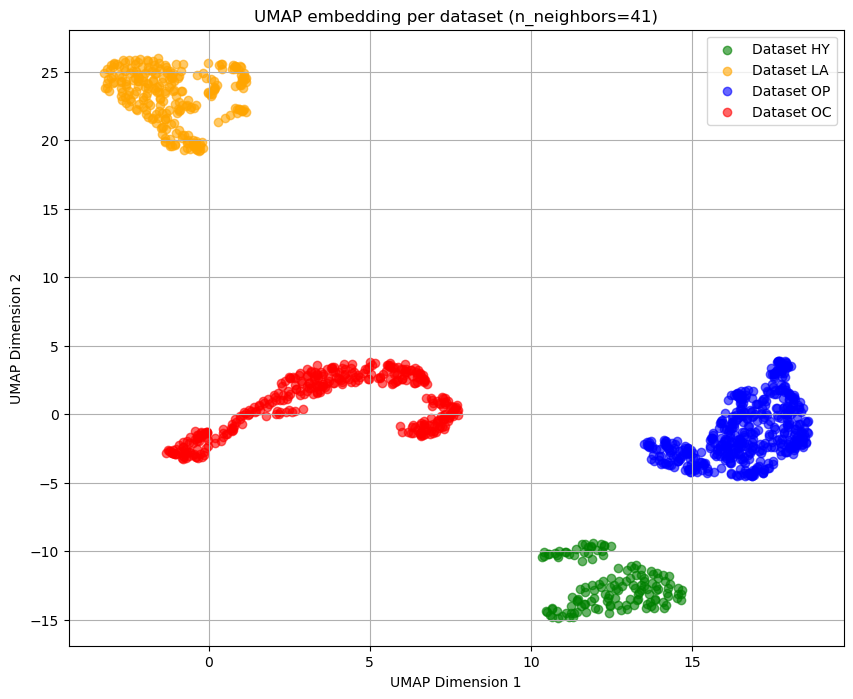


Miglior ARI: -1.00


In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import umap

# Inizializzazione
max_ari = -1
neighbours = [41]

# Array di etichette per identificare il dataset di origine
dataset_labels = (
    ["OC"] * df_oc.shape[1] +  # Assegna "OC" per ogni colonna di df_oc
    ["OP"] * df_op.shape[1] +  # Assegna "OP" per ogni colonna di df_op
    ["HY"] * df_hy.shape[1] +  # Assegna "HY" per ogni colonna di df_hy
    ["LA"] * df_la.shape[1]    # Assegna "LA" per ogni colonna di df_la
)

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Assegna un colore per ogni dataset
    color_map = {"OC": "red", "OP": "blue", "HY": "green", "LA": "orange"}
    
    # Visualizzazione dei punti con colori distinti per dataset
    plt.figure(figsize=(10, 8))
    for label in set(dataset_labels):
        mask = np.array(dataset_labels) == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            c=color_map[label],
            label=f"Dataset {label}",
            alpha=0.6
        )
    
    plt.title(f"UMAP embedding per dataset (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari:.2f}")


------------------------------------------------------------------------------
PROVO CON 41 N_NEIGHBOURS

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Adjusted Rand Score con true labels type: 0.71
Silhouette Score: 0.75
Neighbours = 41


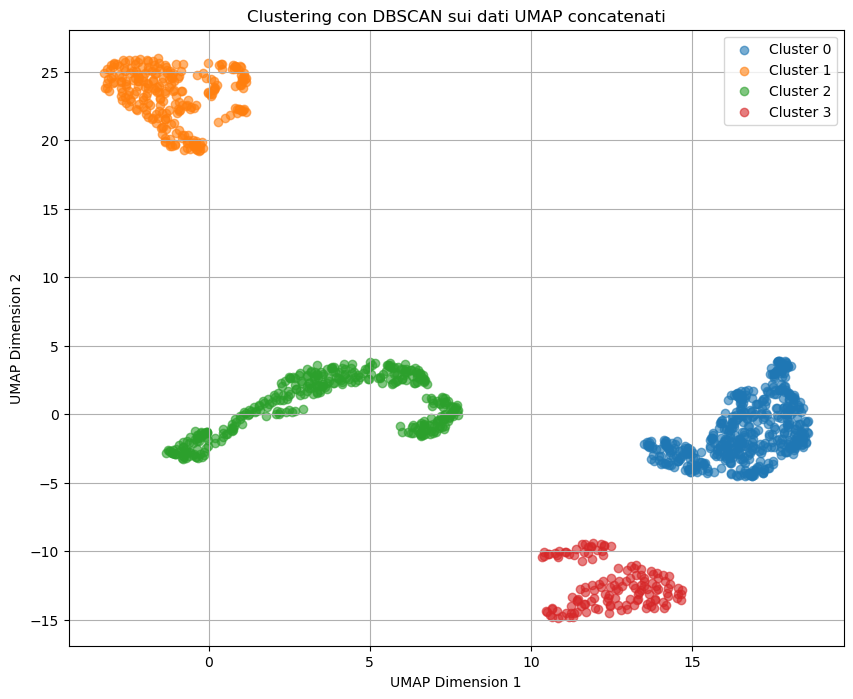

In [33]:
import umap
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score 
import matplotlib.pyplot as plt

max_ari = -1
neighbours= [41]
for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Applicazione del clustering con DBSCAN usando fit_predict
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    
    # Stampa delle etichette di clustering
    # print(f"Cluster labels: {cluster_labels}")
    
    # Calcolo del Silhouette Score (solo se ci sono più di 1 cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(combined_embedding, labels)
    #     print(f"Silhouette Score: {score:.2f}")
    # else:
    #     print("Silhouette Score non calcolabile: solo un cluster trovato o rumore (-1).")
    
    ar = adjusted_rand_score(combined_dataset['Type'], labels)
    if ar > max_ari:
        max_ari = ar
        print(f"Adjusted Rand Score con true labels type: {ar:.2f}")
        print(f"Silhouette Score: {score:.2f}")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            label=f"Cluster {label}" if label != -1 else "Noise",
            alpha=0.6
        )
    plt.title("Clustering con DBSCAN sui dati UMAP concatenati")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[2 2 2 ... 1 1 1]

Clustering con n_neighbors=41
Cluster 2: ['SS_INT_0519', 'SS_INT_0035', 'SS_PR126', 'SS_305', 'SS_145', 'SS_PR131', 'SS_PR132', 'SS_PR133', 'SS_PR136', 'SS_PR139', 'SS_NPR125', 'SS_PR150', 'SS_PR151', 'SS_PR153', 'SS_PR154', 'SS_PR156', 'SS_PR157', 'SS_PR142', 'SS_PR161', 'SS_PR146', 'SS_PR147', 'SS_PR149', 'SS_INT_MI_0005', 'SS_INT_MI_0026', 'SS_INT_MI_0051', 'SS_INT_MI_0049', 'SS_INT_0351', 'SS_INT_MI_0086', 'SS_INT_MI_0091', 'SS_INT_MI_0087', 'SS_INT_0040', 'SS_INT_0469', 'SS_INT_MI_0243', 'SS_VUMC_013', 'SS_VUMC_137', 'SS_VUMC_034', 'SS_INT_MI_0093', 'SS_VUMC_045', 'SS_253', 'SS_VUMC_047', 'SS_VUMC051', 'SS_VUMC_116', 'SS_VUMC_032', 'SS_VUMC_144', 'SS_VUMC_166', 'SS_251', 'SS_VUMC_OC_2995', 'SS_VUMC_OC_8718', 'SS_INT_MI_0108', 'SS_INT_MI_0112', 'SS_VUMC_OC_6946', 'SS_INT_0535', 'SS_173', 'SS_174', 'SS_175', 'SS_177', 'SS_295', 'SS_91', 'SS_227', 'SS_228', 'SS_231', 'SS_233', 'SS_254', 'SS_257', 'SS_155', 'SS_160', 'SS_158', 'SS_150', 'SS_166', 'SS_172', 'SS_184',

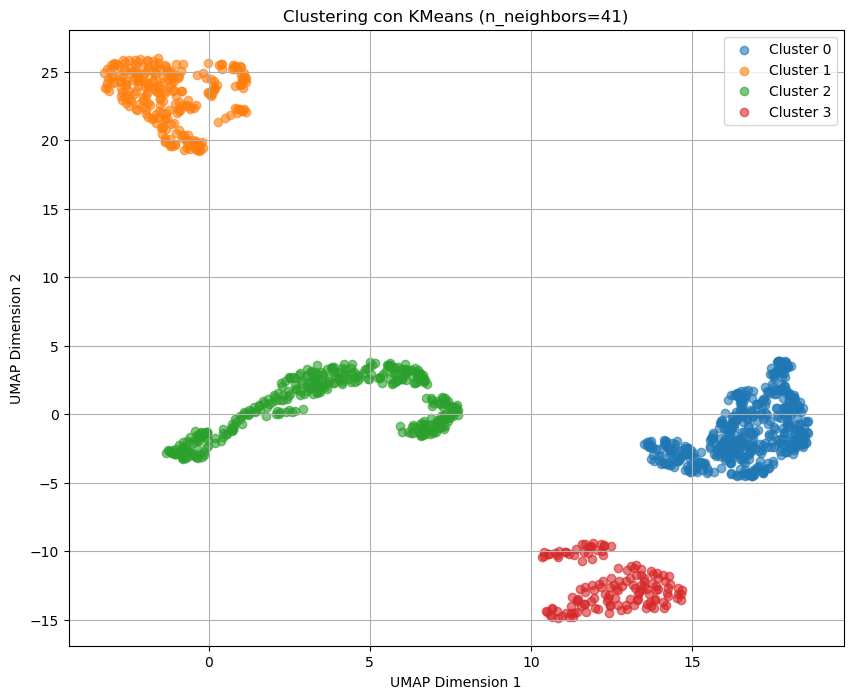


Miglior ARI: 0.71


In [44]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Inizializzazione
max_ari = -1
neighbours = [41]

# Lista con i nomi dei pazienti
patient_names = df_genomica_oc.columns.tolist() + df_genomica_op.columns.tolist() + df_genomica_hy.columns.tolist() + df_genomica_la.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    print(labels)
    # Stampa delle etichette di clustering
    cluster_dict = {}
    for idx, label in enumerate(labels):
        if label not in cluster_dict:
            cluster_dict[label] = []
        cluster_dict[label].append(patient_names[idx])
        
    print(f"\nClustering con n_neighbors={n}")
    for cluster_id, patients in cluster_dict.items():
        print(f"Cluster {cluster_id}: {patients}")
    
    # Calcolo delle metriche
    score = silhouette_score(combined_embedding, labels) if len(set(labels)) > 1 else None
    ari = adjusted_rand_score(combined_dataset['Type'], labels)
    
    if ari > max_ari:
        max_ari = ari
        print(f"\nNuovo miglior ARI: {ari:.2f}")
        print(f"Silhouette Score: {score:.2f}" if score is not None else "Silhouette Score non calcolabile.")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari:.2f}")


--------------------------------------
PROVO CON 150 N NEIGHBOURS

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Adjusted Rand Score con true labels type: 0.71
Silhouette Score: 0.77
Neighbours = 150


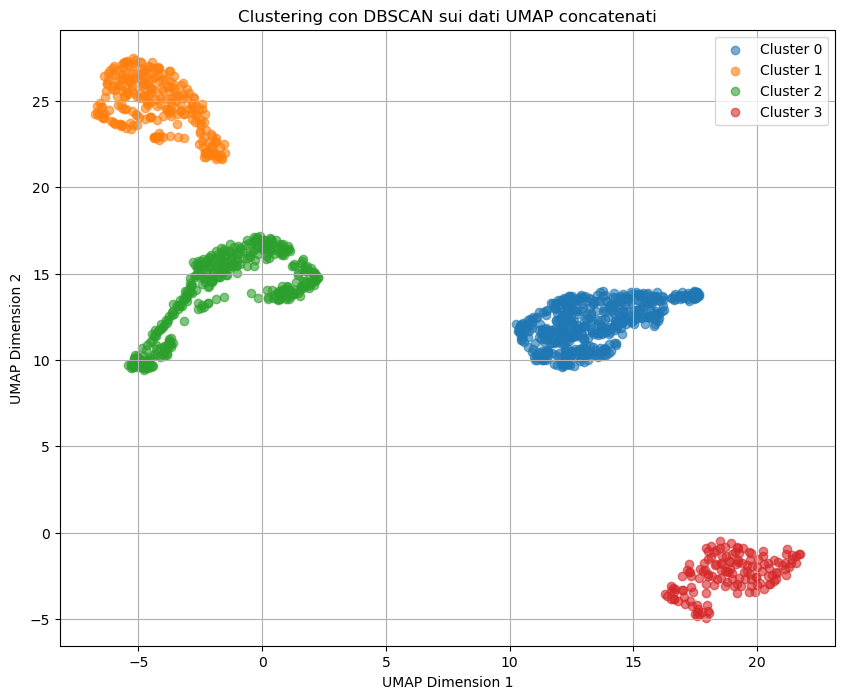

In [36]:
import umap
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score 
import matplotlib.pyplot as plt

max_ari = -1
neighbours= [150]
for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Applicazione del clustering con DBSCAN usando fit_predict
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    
    # Stampa delle etichette di clustering
    # print(f"Cluster labels: {cluster_labels}")
    
    # Calcolo del Silhouette Score (solo se ci sono più di 1 cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(combined_embedding, labels)
    #     print(f"Silhouette Score: {score:.2f}")
    # else:
    #     print("Silhouette Score non calcolabile: solo un cluster trovato o rumore (-1).")
    
    ar = adjusted_rand_score(combined_dataset['Type'], labels)
    if ar > max_ari:
        max_ari = ar
        print(f"Adjusted Rand Score con true labels type: {ar:.2f}")
        print(f"Silhouette Score: {score:.2f}")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            label=f"Cluster {label}" if label != -1 else "Noise",
            alpha=0.6
        )
    plt.title("Clustering con DBSCAN sui dati UMAP concatenati")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


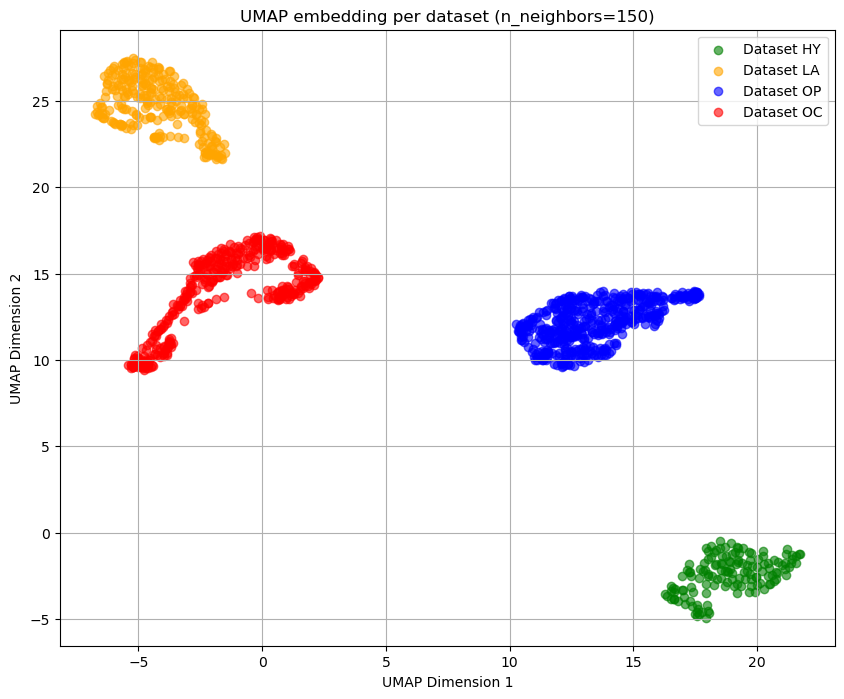


 ARI:


In [50]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import umap

# Inizializzazione
max_ari = -1
neighbours = [150]

# Array di etichette per identificare il dataset di origine
dataset_labels = (
    ["OC"] * df_oc.shape[1] +  # Assegna "OC" per ogni colonna di df_oc
    ["OP"] * df_op.shape[1] +  # Assegna "OP" per ogni colonna di df_op
    ["HY"] * df_hy.shape[1] +  # Assegna "HY" per ogni colonna di df_hy
    ["LA"] * df_la.shape[1]    # Assegna "LA" per ogni colonna di df_la
)

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Assegna un colore per ogni dataset
    color_map = {"OC": "red", "OP": "blue", "HY": "green", "LA": "orange"}
    
    # Visualizzazione dei punti con colori distinti per dataset
    plt.figure(figsize=(10, 8))
    for label in set(dataset_labels):
        mask = np.array(dataset_labels) == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            c=color_map[label],
            label=f"Dataset {label}",
            alpha=0.6
        )
    
    plt.title(f"UMAP embedding per dataset (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\n ARI:")


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[2 2 2 ... 1 1 1]
ID paziente: 0, Nome: SS_INT_0519, Cluster: 2
ID paziente: 1, Nome: SS_INT_0035, Cluster: 2
ID paziente: 2, Nome: SS_PR126, Cluster: 2
ID paziente: 3, Nome: SS_305, Cluster: 2
ID paziente: 4, Nome: SS_145, Cluster: 2
ID paziente: 5, Nome: SS_PR131, Cluster: 2
ID paziente: 6, Nome: SS_PR132, Cluster: 2
ID paziente: 7, Nome: SS_PR133, Cluster: 2
ID paziente: 8, Nome: SS_PR136, Cluster: 2
ID paziente: 9, Nome: SS_PR139, Cluster: 2
ID paziente: 10, Nome: SS_NPR125, Cluster: 2
ID paziente: 11, Nome: SS_PR150, Cluster: 2
ID paziente: 12, Nome: SS_PR151, Cluster: 2
ID paziente: 13, Nome: SS_PR153, Cluster: 2
ID paziente: 14, Nome: SS_PR154, Cluster: 2
ID paziente: 15, Nome: SS_PR156, Cluster: 2
ID paziente: 16, Nome: SS_PR157, Cluster: 2
ID paziente: 17, Nome: SS_PR142, Cluster: 2
ID paziente: 18, Nome: SS_PR161, Cluster: 2
ID paziente: 19, Nome: SS_PR146, Cluster: 2
ID paziente: 20, Nome: SS_PR147, Cluster: 2
ID paziente: 21, Nome: SS_PR149, Cluster: 2
ID paziente: 22, Nome

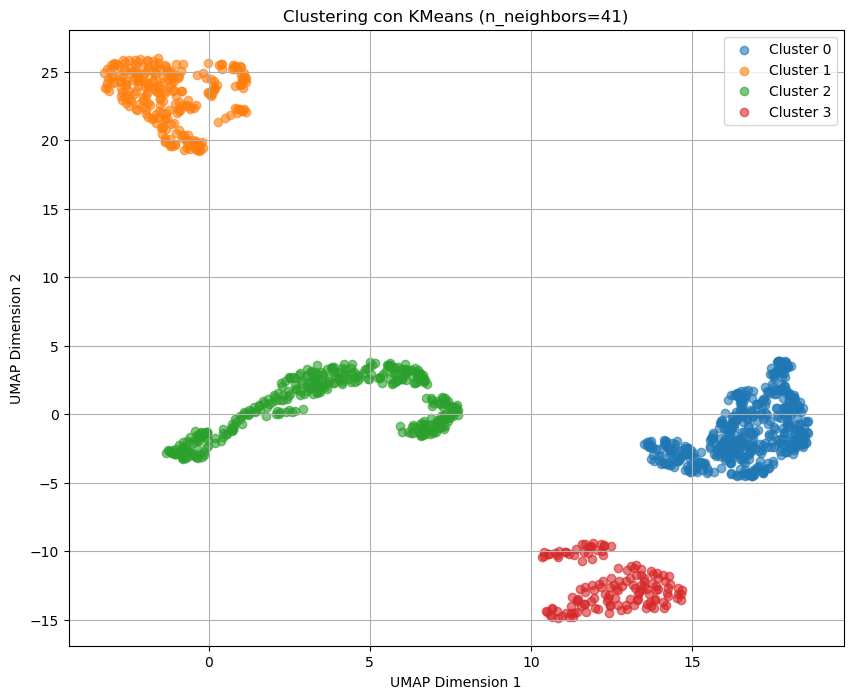


Miglior ARI: 0.71


In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
#VALORI ARS OTTIMO 40,60,41,100,150
# Inizializzazione
max_ari = -1
neighbours = [41]

# Lista con i nomi dei pazienti
patient_names = df_genomica_oc.columns.tolist() + df_genomica_op.columns.tolist() + df_genomica_hy.columns.tolist() + df_genomica_la.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    print(labels)
    # Stampa delle etichette di clustering
    cluster_dict = {}
    for idx, label in enumerate(labels):
        if label not in cluster_dict:
            cluster_dict[label] = []
        cluster_dict[label].append(patient_names[idx])
        print(f"ID paziente: {idx}, Nome: {patient_names[idx]}, Cluster: {label}")
        
    print(f"\nClustering con n_neighbors={n}")
    for cluster_id, patients in cluster_dict.items():
        print(f"Cluster {cluster_id}: {patients}")
    
    # Calcolo delle metriche
    score = silhouette_score(combined_embedding, labels) if len(set(labels)) > 1 else None
    ari = adjusted_rand_score(combined_dataset['Type'], labels)
    
    if ari > max_ari:
        max_ari = ari
        print(f"\nNuovo miglior ARI: {ari:.2f}")
        print(f"Silhouette Score: {score:.2f}" if score is not None else "Silhouette Score non calcolabile.")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari:.2f}")


____________________________________
PAZIENTI CON RECIDIVA

In [101]:
#LISTA DI PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE
pazienti_con_ricorrenza = ['SS_UL0006', 'SS_UL0009', 'SS_UL0015', 'SS_UDUS115', 'SS_UDUS116','SS_UDUS125', 'SS_UDUS126', 'SS_UDUS129', 'SS_UDUS133','SS_UDUS148', 'SS_UDUS163', 'SS_UDUS140', 'SS_MAASTRO_5588','SS_MAASTRO_215', 'SS_MAASTRO_416', 'SS_MAASTRO_588','SS_MAASTRO_4746', 'SS_MAASTRO_2867', 'SS_MAASTRO_7077','SS_MAASTRO_177', 'SS_MAASTRO_7265', 'SS_MAASTRO_5082','SS_MAASTRO_8441', 'SS_MAASTRO_8118', 'SS_MAASTRO_8386','SS_MAASTRO_6905', 'SS_INT_MI_0045', 'SS_INT_MI_0146','SS_INT_MI_0103', 'SS_INT_MI_0055', 'SS_INT_MI_0034',
       'SS_INT_0266', 'SS_INT_0056', 'SS_INT_0064', 'SS_INT_0105','SS_INT_0148', 'SS_INT_0157', 'SS_INT_0016', 'SS_INT_0017','SS_INT_0020', 'SS_INT_0069', 'SS_INT_0267', 'SS_INT_0138','SS_INT_0197', 'SS_INT_0272', 'SS_INT_0220', 'SS_INT_0236','SS_INT_0247', 'SS_INT_0144', 'SS_INT_0182', 'SS_INT_0024','SS_INT_0249', 'SS_INT_0003', 'SS_INT_0313', 'SS_INT_0012',
       'SS_INT_0303', 'SS_INT_0310', 'SS_INT_0280', 'SS_INT_0353',
       'SS_INT_0354', 'SS_INT_0356', 'SS_INT_0357', 'SS_INT_0361',
       'SS_INT_0104', 'SS_INT_0515', 'SS_INT_0390', 'SS_INT_0269',
       'SS_INT_0398', 'SS_INT_0402', 'SS_INT_0503', 'SS_INT_0420',
       'SS_INT_0264', 'SS_INT_0244', 'SS_INT_0347', 'SS_INT_0296',
       'SS_INT_0297', 'SS_INT_0308', 'SS_INT_0309', 'SS_INT_0124',
       'SS_INT_0318', 'SS_INT_0324', 'SS_INT_0327', 'SS_INT_0392',
       'SS_INT_0423', 'SS_INT_0406', 'SS_INT_0436', 'SS_INT_0413',
       'SS_INT_0528', 'SS_INT_0002', 'SS_INT_0485', 'SS_INT_0464',
       'SS_INT_0516', 'SS_INT_0255', 'SS_INT_0273', 'SS_INT_0158',
       'SS_INT_0328', 'SS_INT_0042', 'SS_INT_0518', 'SS_INT_0517',
       'SS_INT_0305', 'SS_INT_0531', 'SS_INT_0530', 'SS_INT_0532',
       'SS_INT_0323', 'SS_INT_0165', 'SS_AOP_PR16', 'SS_AOP_PR16_9745',
       'SS_AOP_PR17', 'SS_AOP_PRX7', 'SS_AOP_PRX8', 'SS_AOP_PR20_9224',
       'SS_AOP_PR21', 'SS_AOP_PR21_9812', 'SS_AOP_PR_A',
       'SS_AOP_PR21_122', 'SS_AOP_PR21_5437', 'SS_AOP_PR22',
       'SS_AOP_PR17_3965', 'SS_AOP_PR18_5300', 'SS_AOP_PR19_2030',
       'SS_AOP_PR_A_1043', 'SS_AOP_PR19_3106', 'SS_SBA_0008',
       'SS_SBA_0014', 'SS_SBA0075', 'SS_SBA_0058', 'SS_SBA_0050',
       'SS_SBA_0088', 'SS_SBA0082', 'SS_SBA0080', 'SS_SBA_0048', 'SS_91',
       'SS_93_9405', 'SS_146', 'SS_158', 'SS_163', 'SS_169', 'SS_173',
       'SS_174', 'SS_176', 'SS_226', 'SS_231', 'SS_232', 'SS_251',
       'SS_257', 'SS_258', 'SS_276', 'SS_287', 'SS_297', 'SS_298',
       'SS_302', 'SS_305', 'SS_307', 'SS_308', 'SS_309', 'SS_327',
       'SS_NPR125', 'SS_PR126', 'SS_PR131', 'SS_PR132', 'SS_PR135',
       'SS_PR136', 'SS_PR142', 'SS_PR148', 'SS_PR149', 'SS_PR150',
       'SS_PR163', 'SS_INT_MI_0118', 'SS_INT_MI_0108', 'SS_INT_MI_0153',
       'SS_INT_MI_0092', 'SS_INT_MI_0100', 'SS_INT_MI_0070',
       'SS_INT_MI_0243', 'SS_INT_MI_0140', 'SS_INT_MI_0122',
       'SS_INT_MI_0041', 'SS_INT_MI_0001', 'SS_INT_MI_0087',
       'SS_INT_MI_0097', 'SS_INT_MI_0151', 'SS_INT_MI_0088',
       'SS_INT_MI_0076', 'SS_INT_MI_0159', 'SS_INT_MI_0059',
       'SS_INT_MI_0018', 'SS_INT_MI_0062', 'SS_INT_0075',
       'SS_INT_MI_0235', 'SS_INT_MI_0009', 'SS_INT_MI_0127',
       'SS_INT_MI_0090', 'SS_INT_MI_0130', 'SS_INT_MI_0225',
       'SS_INT_MI_0128', 'SS_INT_MI_0185', 'SS_INT_MI_0107',
       'SS_INT_MI_0224', 'SS_INT_MI_0007', 'SS_INT_MI_0223',
       'SS_INT_MI_0093', 'SS_INT_MI_0049', 'SS_INT_MI_0051',
       'SS_INT_0065', 'SS_INT_0079', 'SS_INT_0265', 'SS_INT_0259',
       'SS_INT_0270', 'SS_INT_0180', 'SS_INT_0186', 'SS_INT_0190',
       'SS_INT_0216', 'SS_INT_0014', 'SS_INT_0035', 'SS_INT_0084',
       'SS_INT_0123', 'SS_INT_0126', 'SS_INT_0155', 'SS_INT_0139',
       'SS_INT_0202', 'SS_INT_0250', 'SS_INT_0172', 'SS_INT_0181',
       'SS_INT_0143', 'SS_INT_0271', 'SS_INT_0282', 'SS_INT_0044',
       'SS_INT_0277', 'SS_INT_0256', 'SS_INT_0261', 'SS_INT_0052',
       'SS_INT_0040', 'SS_INT_0312', 'SS_INT_0330', 'SS_INT_0333',
       'SS_INT_0342', 'SS_INT_0071', 'SS_INT_0350', 'SS_INT_0351',
       'SS_INT_0077', 'SS_INT_0359', 'SS_INT_0099', 'SS_INT_0363',
       'SS_INT_0367', 'SS_INT_0374', 'SS_INT_0382', 'SS_INT_0409',
       'SS_INT_0179', 'SS_INT_0412', 'SS_INT_0437', 'SS_INT_0444',
       'SS_INT_0446', 'SS_INT_0447', 'SS_INT_0453', 'SS_INT_0454',
       'SS_INT_0476', 'SS_INT_0294', 'SS_INT_0438', 'SS_INT_0430',
       'SS_INT_0508', 'SS_INT_0506', 'SS_INT_0217', 'SS_INT_0419',
       'SS_INT_0415', 'SS_INT_0194', 'SS_INT_0410', 'SS_INT_0400',
       'SS_INT_0497', 'SS_INT_0494', 'SS_INT_0470', 'SS_INT_0095',
       'SS_INT_0355', 'SS_INT_0491', 'SS_INT_0490', 'SS_INT_0489',
       'SS_INT_0293', 'SS_INT_0487', 'SS_INT_0348', 'SS_INT_0486',
       'SS_INT_0344', 'SS_INT_0341', 'SS_INT_0335', 'SS_INT_0482',
       'SS_INT_0365', 'SS_INT_0383', 'SS_INT_0387', 'SS_INT_0408',
       'SS_INT_0421', 'SS_INT_0384', 'SS_INT_0519', 'SS_INT_0427',
       'SS_INT_0288', 'SS_INT_0471', 'SS_INT_0385', 'SS_INT_0417',
       'SS_INT_0329', 'SS_INT_0037', 'SS_INT_0343', 'SS_INT_0373',
       'SS_INT_0380', 'SS_INT_0391', 'SS_INT_0424', 'SS_INT_0535',
       'SS_INT_0340', 'SS_INT_0411', 'SS_INT_0168', 'SS_UDUS7',
       'SS_UDUS9', 'SS_UDUS22', 'SS_UDUS34', 'SS_UDUS40', 'SS_UDUS51',
       'SS_UDUS58', 'SS_UDUS61', 'SS_UDUS4', 'SS_UDUS30', 'SS_UDUS78',
       'SS_UDUS81', 'SS_UDUS94', 'SS_UDUS64', 'SS_UDUS62', 'SS_UDUS67',
       'SS_MAASTRO_3946', 'SS_MAASTRO_609', 'SS_MAASTRO_2835',
       'SS_MAASTRO_9495', 'SS_MAASTRO_7879', 'SS_MAASTRO_8534',
       'SS_MAASTRO_6983', 'SS_MAASTRO_8033', 'SS_MAASTRO_6417',
       'SS_MAASTRO_9474', 'SS_MAASTRO_3328', 'SS_MAASTRO_7347',
       'SS_MAASTRO_2517', 'SS_MAASTRO_5111', 'SS_MAASTRO_9983',
       'SS_MAASTRO_6790', 'SS_MAASTRO_5979', 'SS_MAASTRO_7504',
       'SS_MAASTRO_4661', 'SS_MAASTRO_3880', 'SS_MAASTRO_6175',
       'SS_MAASTRO_6917', 'SS_MAASTRO_7303', 'SS_MAASTRO_3732',
       'SS_MAASTRO_7906', 'SS_MAASTRO_1257', 'SS_MAASTRO_272',
       'SS_MAASTRO_7006', 'SS_MAASTRO_6474', 'SS_MAASTRO_7773',
       'SS_MAASTRO_8623', 'SS_MAASTRO_8354', 'SS_MAASTRO_5470',
       'SS_MAASTRO_3180', 'SS_MAASTRO_7048', 'SS_MAASTRO_2500',
       'SS_MAASTRO_4462', 'SS_MAASTRO_576', 'SS_MAASTRO_1283',
       'SS_MAASTRO_7151', 'SS_MAASTRO_6972', 'SS_MAASTRO_7711',
       'SS_MAASTRO_9583', 'SS_MAASTRO_4393', 'SS_MAASTRO_6489',
       'SS_MAASTRO_1706', 'SS_MAASTRO_6168', 'SS_MAASTRO_5370',
       'SS_MAASTRO_5546', 'SS_MAASTRO_9255', 'SS_MAASTRO_3897',
       'SS_MAASTRO_9886', 'SS_MAASTRO_1291', 'SS_MAASTRO_4801',
       'SS_MAASTRO_1836', 'SS_MAASTRO_7147', 'SS_MAASTRO_5281',
       'SS_MAASTRO_969', 'SS_MAASTRO_238', 'SS_MAASTRO_53813',
       'SS_VUMC_011', 'SS_VUMC_020', 'SS_VUMC_021', 'SS_VUMC_040',
       'SS_VUMC_064', 'SS_VUMC_066', 'SS_VUMC_068', 'SS_VUMC_077',
       'SS_VUMC_088', 'SS_VUMC_107', 'SS_VUMC_116', 'SS_VUMC_119',
       'SS_VUMC051', 'SS_VUMC_138', 'SS_VUMC_147', 'SS_VUMC_186',
       'SS_VUMC_196', 'SS_VUMC_OC_4275', 'SS_VUMC_OC_1860',
       'SS_VUMC_OC_3383', 'SS_VUMC_OC_3744', 'SS_VUMC_OC_6758',
       'SS_VUMC_OC_2676', 'SS_VUMC_OC_4196', 'SS_VUMC_OC_8636',
       'SS_VUMC_OC_6494', 'SS_VUMC_OC_8600', 'SS_VUMC_OC_8033',
       'SS_VUMC_OC_2801', 'SS_VUMC_OC_7559', 'SS_VUMC_OC_5735',
       'SS_VUMC_OC_6666', 'SS_VUMC_218', 'SS_VUMC_096', 'SS_VUMC_110',
       'SS_VUMC_166', 'SS_VUMC_175', 'SS_VUMC_202', 'SS_VUMC_205',
       'SS_VUMC_OP_1439', 'SS_VUMC_OP_639', 'SS_VUMC_OP_2071',
       'SS_VUMC_OP_5132', 'SS_VUMC_OP_4053', 'SS_VUMC_OP_8929',
       'SS_VUMC_OP_2375', 'SS_VUMC_OP_9850', 'SS_VUMC_OP_7374',
       'SS_VUMC_OP_2220', 'SS_VUMC_OP_7702', 'SS_VUMC_OP_6371',
       'SS_VUMC_OP_7942', 'SS_VUMC_OP_6471', 'SS_VUMC_OP_604',
       'SS_VUMC_OP_6545', 'SS_VUMC_HPL_3735', 'SS_VUMC_HPL_8582',
       'SS_VUMC_HPL_167', 'SS_VUMC_HPL_596', 'SS_VUMC_HPL_8569',
       'SS_VUMC_HPL_7423', 'SS_VUMC_HPL_259', 'SS_VUMC_HPL_8154',
       'SS_VUMC_HPL_7415', 'SS_VUMC_HPL_2485', 'SS_VUMC_HPL_5499',
       'SS_VUMC_HPL_2946', 'SS_VUMC_HPL_1753', 'SS_VUMC_HPL_6747',
       'SS_VUMC_HPL_1354', 'SS_VUMC_HPL_1509', 'SS_VUMC_HPL_6555',
       'SS_VUMC_HPL_4078', 'SS_VUMC_HPL_4620', 'SS_VUMC_HPL_8908',
       'SS_VUMC_HPL_9443', 'SS_VUMC_HPL_9990', 'SS_VUMC_HPL_641',
       'SS_VUMC_HPL_6441', 'SS_VUMC_HPL_4004', 'SS_VUMC_HPL_9271',
       'SS_VUMC_OP_983', 'SS_VUMC_OP_1135', 'SS_VUMC_OP_8135',
       'SS_VUMC_OP_3673', 'SS_VUMC_OP_2899', 'SS_VUMC_OP_1079',
       'SS_VUMC_OP_5152', 'SS_VUMC_OP_7387', 'SS_VUMC_OP_6646',
       'SS_VUMC_OP_5667', 'SS_VUMC_OP_2710', 'SS_VUMC_OP_5431',
       'SS_VUMC_OP_3483', 'SS_VUMC_OP_4170', 'SS_VUMC_OP_8325',
       'SS_VUMC_OP_7536', 'SS_VUMC_OP_6402', 'SS_VUMC_OP_9515',
       'SS_VUMC_OP_5747', 'SS_VUMC_OP_4667', 'SS_VUMC_OP_540',
       'SS_VUMC_OP_9673', 'SS_VUMC_OP_5362', 'SS_VUMC_OP_7452',
       'SS_VUMC_OP_62', 'SS_VUMC_OP_7574', 'SS_VUMC_HPL_677',
       'SS_VUMC_HPL_7065', 'SS_VUMC_HPL_5057', 'SS_VUMC_HPL_7569',
       'SS_VUMC_HPL_3990', 'SS_VUMC_HPL_3294', 'SS_VUMC_HPL_1422',
       'SS_VUMC_HPL_8699', 'SS_VUMC_HPL_1601', 'SS_VUMC_HPL_6151',
       'SS_VUMC_HPL_2682', 'SS_VUMC_HPL_1315', 'SS_VUMC_HPL_3593',
       'SS_VUMC_HPL_7464', 'SS_VUMC_HPL_2988', 'SS_VUMC_HPL_4427',
       'SS_VUMC_HPL_3711', 'SS_VUMC_HPL_7244', 'SS_VUMC_HPL_8612',
       'SS_VUMC_HPL_1859', 'SS_VUMC_HPL_4174', 'SS_VUMC_HPL_5181']


In [103]:
# len(df_oc.T)
len(pazienti_con_ricorrenza)

511

In [105]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (ORAL CAVITY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_oc.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_oc_vivi_con_ricorrenza = df_oc[columns_to_keep]


In [108]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (OP) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_op.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_op_vivi_con_ricorrenza = df_op[columns_to_keep]

In [110]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (LA) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_la.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_la_vivi_con_ricorrenza = df_la[columns_to_keep]

In [112]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (HY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_hy.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_hy_vivi_con_ricorrenza = df_hy[columns_to_keep]

In [116]:
print('I pazienti OC con recidiva sono', len(df_oc_vivi_con_ricorrenza.T),
      '\nI pazienti LA con recidiva sono', len(df_la_vivi_con_ricorrenza.T),
      '\nI pazienti HY con recidiva sono', len(df_hy_vivi_con_ricorrenza.T),
      '\nI pazienti OP con recidiva sono', len(df_op_vivi_con_ricorrenza.T))

print('In totale i pazienti che hanno avuto una recidiva del tumore sono:', len(df_oc_vivi_con_ricorrenza.T)+len(df_la_vivi_con_ricorrenza.T)+ len(df_hy_vivi_con_ricorrenza.T)+len(df_op_vivi_con_ricorrenza.T))

I pazienti OC con recidiva sono 154 
I pazienti LA con recidiva sono 71 
I pazienti HY con recidiva sono 58 
I pazienti OP con recidiva sono 124
In totale i pazienti che hanno avuto una recidiva del tumore sono: 407


In [118]:
# Ottieni i pazienti presenti nei 4 dataset
pazienti_presenti = set(df_oc_vivi_con_ricorrenza.columns) | \
                    set(df_la_vivi_con_ricorrenza.columns) | \
                    set(df_hy_vivi_con_ricorrenza.columns) | \
                    set(df_op_vivi_con_ricorrenza.columns)

# Trova i pazienti che sono in pazienti_con_ricorrenza ma non nei dataset
pazienti_mancanti = set(pazienti_con_ricorrenza) - pazienti_presenti

# Visualizza i pazienti mancanti
print("Pazienti con recidiva non trovati nei 4 dataset:", len(pazienti_mancanti))
print(pazienti_mancanti)

Pazienti con recidiva non trovati nei 4 dataset: 104
{'SS_INT_0409', 'SS_INT_0343', 'SS_INT_0485', 'SS_INT_0410', 'SS_INT_0438', 'SS_INT_0391', 'SS_AOP_PR21_5437', 'SS_INT_0373', 'SS_MAASTRO_3328', 'SS_INT_0454', 'SS_INT_0158', 'SS_INT_0486', 'SS_INT_0259', 'SS_INT_0444', 'SS_INT_0342', 'SS_INT_0357', 'SS_INT_0282', 'SS_INT_0494', 'SS_INT_0453', 'SS_INT_0340', 'SS_INT_0515', 'SS_INT_0186', 'SS_INT_0517', 'SS_VUMC_HPL_4620', 'SS_INT_0052', 'SS_INT_0104', 'SS_INT_0476', 'SS_VUMC_OP_7536', 'SS_INT_0518', 'SS_INT_0400', 'SS_INT_0350', 'SS_INT_0341', 'SS_INT_0344', 'SS_INT_0464', 'SS_INT_0406', 'SS_INT_0261', 'SS_INT_0270', 'SS_INT_0194', 'SS_INT_MI_0127', 'SS_SBA_0008', 'SS_INT_0411', 'SS_VUMC_HPL_3294', 'SS_AOP_PR_A', 'SS_INT_0077', 'SS_INT_0264', 'SS_MAASTRO_8386', 'SS_INT_0437', 'SS_INT_0348', 'SS_VUMC_HPL_3735', 'SS_INT_0363', 'SS_INT_0446', 'SS_INT_0071', 'SS_PR163', 'SS_UDUS22', 'SS_INT_0436', 'SS_SBA_0048', 'SS_INT_0365', 'SS_INT_0308', 'SS_VUMC_HPL_7065', 'SS_INT_0491', 'SS_INT_039

In [120]:
#PAZIENTI CON RECIDIVA DI CUI SAPPIAMO I DATI GENOMICI E CHE SONO PRESENTI DENTRO AD UNO DEI 4 DATASET
print('Pazienti con recidiva trovati nei 4 dataset:', pazienti_presenti, 'e sono:', len(pazienti_presenti))

Pazienti con recidiva trovati nei 4 dataset: {'SS_AOP_PR17', 'SS_INT_MI_0185', 'SS_INT_0359', 'SS_MAASTRO_6972', 'SS_287', 'SS_MAASTRO_416', 'SS_VUMC_HPL_7244', 'SS_VUMC_HPL_9443', 'SS_VUMC_218', 'SS_INT_0157', 'SS_MAASTRO_576', 'SS_INT_0181', 'SS_MAASTRO_4462', 'SS_VUMC_HPL_7464', 'SS_VUMC_119', 'SS_VUMC_OP_639', 'SS_VUMC_OP_2375', 'SS_VUMC_OP_7574', 'SS_INT_0172', 'SS_INT_0266', 'SS_VUMC_OP_983', 'SS_VUMC_HPL_641', 'SS_INT_0069', 'SS_MAASTRO_9474', 'SS_232', 'SS_VUMC_OP_1079', 'SS_VUMC_HPL_2946', 'SS_UDUS94', 'SS_INT_MI_0225', 'SS_VUMC_OP_2710', 'SS_VUMC_021', 'SS_INT_0079', 'SS_VUMC_OC_5735', 'SS_MAASTRO_7504', 'SS_INT_0250', 'SS_MAASTRO_5281', 'SS_PR135', 'SS_MAASTRO_5546', 'SS_MAASTRO_7906', 'SS_PR131', 'SS_VUMC_OC_8033', 'SS_INT_0288', 'SS_VUMC_OP_7387', 'SS_VUMC_HPL_8612', 'SS_UDUS9', 'SS_INT_MI_0070', 'SS_VUMC_HPL_7415', 'SS_INT_MI_0090', 'SS_251', 'SS_INT_0190', 'SS_VUMC_OP_5152', 'SS_MAASTRO_1283', 'SS_SBA0080', 'SS_PR136', 'SS_MAASTRO_4801', 'SS_INT_0356', 'SS_INT_0328', 'SS

In [122]:
# doc_r = df_oc_vivi_con_ricorrenza.T
# dla_r = df_la_vivi_con_ricorrenza.T
# dhy_r = df_hy_vivi_con_ricorrenza.T
# dop_r = df_op_vivi_con_ricorrenza.T

# dla_r['Type'] = 'la'
# dhy_r['Type'] = 'hy'
# dop_r['Type'] = 'op'
# doc_r['Type'] = 'oc'

In [268]:
# def add_cols_to_dataset(df_original, df_col_to_add):
#     '''
#     PARAMETRI:
#     DF_ORIGINAL: Dataset originale al quale voglio aggiungere nuove colonne.
#     DF_COL_TO_ADD: Dataset che contiene le colonne da aggiungere a DF_ORIGINAL.

#     RETURN:
#     Ritorna DF_ORIGINAL modificato (con nuove colonne aggiunte).
#     '''
#     # Iterare su ogni nome paziente in df_original
#     for name in df_original.index:
#         # Filtra la riga corrispondente nel dataset df_col_to_add
#         riga = df_col_to_add.loc[df_col_to_add['Patient_ID'] == name]

#         # Aggiungere colonne al dataset originale
#         if not riga.empty:
#             for col in riga.columns:
#                 if col not in df_original.columns:  # Controlla se la colonna esiste già
#                     df_original[col] = None  # Aggiungi la colonna come vuota inizialmente
#                 df_original.loc[name, col] = riga.iloc[0][col]  # Assegna il valore specifico

#     return df_original
    
# doc_r = add_cols_to_dataset(doc_r, df_patient)
# dla_r = add_cols_to_dataset(dla_r, df_patient)
# dop_r = add_cols_to_dataset(dop_r, df_patient)
# dhy_r = add_cols_to_dataset(dhy_r, df_patient)


In [266]:
# combined_dataset_r = pd.concat([doc_r, dop_r, dhy_r, dla_r], ignore_index=False)

In [264]:
# combined_dataset_r

In [262]:
# combined_dataset_r = combined_dataset_r.T
# combined_dataset_r


In [162]:
# combined_dataset_r

In [256]:
# combined_dataset_r.to_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_407_pazienti_recidiv.csv", index=True, header=True)


In [258]:
# df = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_407_pazienti_recidiv.csv", index_col=0)


In [94]:
# combined_dataset_r.to_excel(os.path.join(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza", 'Dataset_407_pazienti_recidiva.xlsx'), index=False)

In [39]:
combined_dataset_r.columns[26904:]

Index(['Type', 'Unnamed: 0', 'Patient_ID', 'Study_Name', 'Study_OID',
       'Study_Start_Date', 'clinical_Age_at_Diagnosis',
       'clinical_Date_of_first_Diagnosis', 'clinical_Hospital', 'clinical_Sex',
       'ctn_Anatomical_Tumor_Location', 'ctn_Laterality_of_T',
       'ctn_Stage_at_Diagnosis_7Edition', 'ctn_TNM_cN_7Edition',
       'ctn_TNM_cT_7Edition', 'ctn_Tumor_Region',
       'follow_Date_of_Examination_or_Last_Contact',
       'follow_Date_of_Recurrence', 'follow_Follow_Up_Period',
       'follow_Recurrence', 'follow_Status_of_Patient',
       'follow_Treatment_of_Recurrence', 'follow_Type_of_Recurrence',
       'patho_HPV_Status_Evaluated', 'patient_Consent',
       'patient_Eligibility_Criteria', 'risk_Additional_precancerous_lesion_1',
       'risk_Alcohol_at_Time_of_Diagnosis',
       'risk_Family_History_of_Malignancies', 'risk_Oral_Hygiene',
       'risk_Smoker_at_Time_of_Diagnosis', 'Recurrence_Tumor',
       'Recurrence_Alive', 'Recurrence_Dead', 'Status_Alive', 'S

In [194]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(n, clusters, df, col):
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')

    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
    op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
    hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
    la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)

    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])

    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels_r = kmeans.fit_predict(combined_embedding_r)

    # Convertire le etichette in stringhe
    true_labels = df[col].astype(str)
    pred_labels = pd.Series(labels_r, index=true_labels.index, dtype=str)  # Assicurati che abbiano la stessa lunghezza

    # Etichette combinate
    all_labels = sorted(set(true_labels) | set(pred_labels))

    # Calcolo della matrice di confusione
    cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

    # Visualizzazione della matrice di confusione
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=all_labels, yticklabels=all_labels)
    return cm


In [184]:
c

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  58,   0,   0,   0,   0,   0],
       [  0,   0,   0,  71,   0,   0,   0,   0],
       [154,   0,   0,   0,   0,   0,   0,   0],
       [  0, 124,   0,   0,   0,   0,   0,   0]], dtype=int64)

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


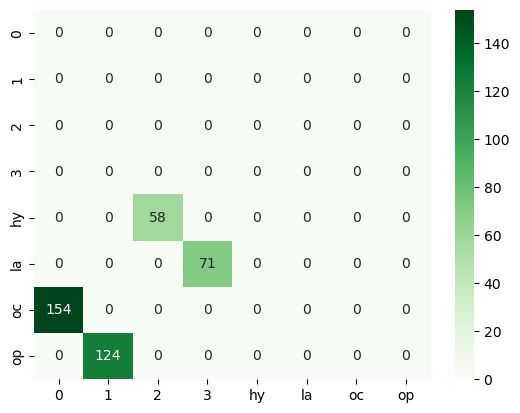

In [196]:
c = print_confusion_matrix(60, 4, combined_dataset_r, 'Type')



In [232]:
# Questi li sai già (o calcoli in altro modo)
n_oc = df_oc_vivi_con_ricorrenza.shape[1]
n_op = df_op_vivi_con_ricorrenza.shape[1]
n_hy = df_hy_vivi_con_ricorrenza.shape[1]
n_la = df_la_vivi_con_ricorrenza.shape[1]
n_total = n_oc + n_op + n_hy + n_la

n_total

def ari_score_2(df,col_target):
    max_ari_r = -1
    best_n = -1
    neighbours=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
    
    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([df_oc_vivi_con_ricorrenza.T, df_op_vivi_con_ricorrenza.T, df_hy_vivi_con_ricorrenza.T, df_la_vivi_con_ricorrenza.T])
        
    
    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    for n in neighbours:
        actual_n_neighbors = min(n, n_total)
        reducer = umap.UMAP(n_neighbors=actual_n_neighbors, min_dist=0.1, n_components=2, random_state=42, metric='cosine')

        combined_embedding_r = reducer.fit_transform(combined_embedding_r)
        
        # Applicazione del clustering con KMeans
        # os.environ["OMP_NUM_THREADS"] = "2"
        kmeans = KMeans(n_clusters=clusters, random_state=42)
        labels_r = kmeans.fit_predict(combined_embedding_r)

        ari_r = adjusted_rand_score(df[col_target], labels_r)
        if ari_r > max_ari_r:
            max_ari_r = ari_r
            best_n = n
            # print(f"\nNuovo miglior ARI: {ari_r:.2f}")
            
            # print('Neighbours =', n)


    return max_ari_r, best_n

In [228]:
# Questi li sai già (o calcoli in altro modo)
n_oc = df_oc_vivi_con_ricorrenza.shape[1]
n_op = df_op_vivi_con_ricorrenza.shape[1]
n_hy = df_hy_vivi_con_ricorrenza.shape[1]
n_la = df_la_vivi_con_ricorrenza.shape[1]
n_total = n_oc + n_op + n_hy + n_la

n_total

def ari_score(df,col_target):
    max_ari_r = -1
    best_n = -1
    neighbours=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
    

    
    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    for n in neighbours:
        actual_n_neighbors = min(n, n_total)
        reducer = umap.UMAP(n_neighbors=actual_n_neighbors, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
        
        # Riduzione della dimensionalità per ciascun dataset
        oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
        op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
        hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
        la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)

        # Concatenazione dei risultati UMAP
        combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
        
        # Applicazione del clustering con KMeans
        # os.environ["OMP_NUM_THREADS"] = "2"
        kmeans = KMeans(n_clusters=clusters, random_state=42)
        labels_r = kmeans.fit_predict(combined_embedding_r)

        ari_r = adjusted_rand_score(df[col_target], labels_r)
        if ari_r > max_ari_r:
            max_ari_r = ari_r
            best_n = n
            # print(f"\nNuovo miglior ARI: {ari_r:.2f}")
            
            # print('Neighbours =', n)


    return max_ari_r, best_n

In [93]:
combined_dataset_r['ctn_Anatomical_Tumor_Location'].unique()

array(['C04.9', 'C04', 'C06.2', 'C01', 'C02.1', 'C02.9', 'C03.1', 'C04.0',
       'C04.8', 'C06.0', 'C03', 'C06', 'C04,C06.2', 'C02.9,C04.9,C06.2',
       'C03.0', 'C04,C06.1', 'C03.9', 'C05.0', 'C03.9,C05.0',
       'C02.0,C04.0', 'C02', 'C02.2', 'C00.5', 'C06.1', 'C04.1', 'C09.9',
       'C05.1,C09.9', 'C10.0', 'C10', 'C09.1', 'C09.0', 'C10.8', 'C09',
       'C05.1', 'C00.9', 'C10.1', 'C05.2', 'C10.9', 'C09.0,C10.8',
       'C10.3', 'C13.9', 'C13.8', 'C12', 'C13.1', 'C13.0', 'C12,C13.2',
       'C13', 'C32.1', 'C32', 'C32.0', 'C32.2'], dtype=object)

In [237]:
col = ['Type', 'Study_Name', 'Study_OID', 'clinical_Hospital', 'clinical_Sex',
       'ctn_Anatomical_Tumor_Location', 'ctn_Laterality_of_T',
       'ctn_Stage_at_Diagnosis_7Edition', 'ctn_TNM_cN_7Edition',
       'ctn_TNM_cT_7Edition', 'ctn_Tumor_Region',
       'follow_Recurrence', 'follow_Status_of_Patient',
       'patho_HPV_Status_Evaluated', 'patient_Consent',
       'patient_Eligibility_Criteria', 'risk_Additional_precancerous_lesion_1',
       'risk_Alcohol_at_Time_of_Diagnosis',
       'risk_Family_History_of_Malignancies', 'risk_Oral_Hygiene',
       'risk_Smoker_at_Time_of_Diagnosis', 'Recurrence_Tumor',
       'Recurrence_Alive', 'Recurrence_Dead', 'Status_Alive', 'Status_Dead',
       'age_group', 'Year_of_first_Diagnosis',
       'Year_of_Examination_or_Last_Contact', 'follow_Year_of_Recurrence',
       'follow_Follow_Up_Period_3', 'CRT', 'CT', 'Clinical study',
       'Immunotherapy', 'No treatment', 'Other', 'RT', 'Surgery',
       'follow_Type_of_Recurrence_Delayed lymp node metastasis',
       'follow_Type_of_Recurrence_Distant metastasis',
       'follow_Type_of_Recurrence_Local',
       'follow_Type_of_Recurrence_Locoregional',
       'follow_Type_of_Recurrence_Regional',
       'follow_Type_of_Recurrence_Second primary tumor',
      'Study_Start_Date_Year']

407

In [239]:
for c in col:
    best_ari, n = ari_score_2(combined_dataset_r, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari, 'con n_neighbours =', n , '\n')

unique: ['oc' 'op' 'hy' 'la'] numero clusters: 4
Il miglior punteggio ARI per la colonna Type è: 0.19994914866744443 con n_neighbours = 5 

unique: ['UDUS' 'INT' 'AOP' 'BRESCIA' 'MAASTRO' 'VUMC' 'ULM'] numero clusters: 7
Il miglior punteggio ARI per la colonna Study_Name è: 0.056882628360952696 con n_neighbours = 10 

unique: ['SE_UDUS_PROSP' 'SE_INT_PROSP' 'SE_AOP_PROSP' 'SE_BRESCIA_PROSP'
 'SE_AOP_RETRO' 'SE_INT_RETRO' 'SE_UDUS_RETRO' 'SE_MAASTRO_RETRO'
 'SE_VUMC_RETRO' 'SE_MAASTRO_PROSP' 'SE_UDUS_EXT_PROSP'] numero clusters: 11
Il miglior punteggio ARI per la colonna Study_OID è: 0.10353902198919786 con n_neighbours = 5 

unique: ['UDUS' 'INT' 'AOP' 'OTHER' 'MAASTRO' 'VUMC' 'ULM'] numero clusters: 7
Il miglior punteggio ARI per la colonna clinical_Hospital è: 0.056882628360952696 con n_neighbours = 10 

unique: ['Female' 'Male'] numero clusters: 2
Il miglior punteggio ARI per la colonna clinical_Sex è: 0.02293106583371601 con n_neighbours = 65 

unique: ['C04.9' 'C04' 'C06.2' 'C01' 

In [230]:
for c in col:
    best_ari, n = ari_score(combined_dataset_r, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari, 'con n_neighbours =', n , '\n')

unique: ['oc' 'op' 'hy' 'la'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Type è: 1.0 con n_neighbours = 30 

unique: ['UDUS' 'INT' 'AOP' 'BRESCIA' 'MAASTRO' 'VUMC' 'ULM'] numero clusters: 7


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Study_Name è: 0.06999957826969028 con n_neighbours = 5 

unique: ['SE_UDUS_PROSP' 'SE_INT_PROSP' 'SE_AOP_PROSP' 'SE_BRESCIA_PROSP'
 'SE_AOP_RETRO' 'SE_INT_RETRO' 'SE_UDUS_RETRO' 'SE_MAASTRO_RETRO'
 'SE_VUMC_RETRO' 'SE_MAASTRO_PROSP' 'SE_UDUS_EXT_PROSP'] numero clusters: 11


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Study_OID è: 0.10373585865280147 con n_neighbours = 15 

unique: ['UDUS' 'INT' 'AOP' 'OTHER' 'MAASTRO' 'VUMC' 'ULM'] numero clusters: 7


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna clinical_Hospital è: 0.06999957826969028 con n_neighbours = 5 

unique: ['Female' 'Male'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna clinical_Sex è: 0.043106455803719614 con n_neighbours = 30 

unique: ['C04.9' 'C04' 'C06.2' 'C01' 'C02.1' 'C02.9' 'C03.1' 'C04.0' 'C04.8'
 'C06.0' 'C03' 'C06' 'C04,C06.2' 'C02.9,C04.9,C06.2' 'C03.0' 'C04,C06.1'
 'C03.9' 'C05.0' 'C03.9,C05.0' 'C02.0,C04.0' 'C02' 'C02.2' 'C00.5' 'C06.1'
 'C04.1' 'C09.9' 'C05.1,C09.9' 'C10.0' 'C10' 'C09.1' 'C09.0' 'C10.8' 'C09'
 'C05.1' 'C00.9' 'C10.1' 'C05.2' 'C10.9' 'C09.0,C10.8' 'C10.3' 'C13.9'
 'C13.8' 'C12' 'C13.1' 'C13.0' 'C12,C13.2' 'C13' 'C32.1' 'C32' 'C32.0'
 'C32.2'] numero clusters: 51


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Anatomical_Tumor_Location è: 0.10675747097737444 con n_neighbours = 85 

unique: ['Left' 'Right' 'Midline'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Laterality_of_T è: 0.023561069190374314 con n_neighbours = 10 

unique: ['Stage III' 'Stage IVB' 'Stage IVA'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Stage_at_Diagnosis_7Edition è: 0.02565256307278826 con n_neighbours = 80 

unique: ['N1' 'N2c' 'N2b' 'N0' 'N2a' 'N3'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_TNM_cN_7Edition è: 0.042413782560742026 con n_neighbours = 45 

unique: ['T2' 'T4b' 'T3' 'T4a' 'T1'] numero clusters: 5


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_TNM_cT_7Edition è: 0.050728094522233085 con n_neighbours = 105 

unique: ['Oral Cavity' 'Oropharynx' 'Hypopharynx' 'Larynx'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Tumor_Region è: 1.0 con n_neighbours = 30 

unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Recurrence è: 1.0 con n_neighbours = 5 

unique: ['Dead' 'Alive'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Status_of_Patient è: 0.027071187250369208 con n_neighbours = 60 

unique: ['Negative' 'Not available' 'Positive'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna patho_HPV_Status_Evaluated è: 0.38347857359510457 con n_neighbours = 60 

unique: ['Yes - Patient' 'Not Applicable' 'Yes - Next of Kin/Legal Representative'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna patient_Consent è: 0.01818359365521991 con n_neighbours = 60 

unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna patient_Eligibility_Criteria è: 1.0 con n_neighbours = 5 

unique: ['No' 'Leukoplakia' 'Oral submucous fibrosis' 'Erythroplakia'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Additional_precancerous_lesion_1 è: 0.009592265164507424 con n_neighbours = 15 

unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Alcohol_at_Time_of_Diagnosis è: 0.014004695284019963 con n_neighbours = 30 

unique: ['No' 'Yes' 'Unknown'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Family_History_of_Malignancies è: 0.04047292255542379 con n_neighbours = 15 

unique: ['Good' 'Intermediate' 'Poor' 'Not available'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Oral_Hygiene è: 0.021772098337887347 con n_neighbours = 15 

unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Smoker_at_Time_of_Diagnosis è: 0.041862877546295404 con n_neighbours = 15 

unique: [1] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Recurrence_Tumor è: 1.0 con n_neighbours = 5 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Recurrence_Alive è: 0.027071187250369208 con n_neighbours = 60 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Recurrence_Dead è: 0.027071187250369208 con n_neighbours = 60 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Status_Alive è: 0.027071187250369208 con n_neighbours = 60 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Status_Dead è: 0.027071187250369208 con n_neighbours = 60 

unique: [3 1 2] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna age_group è: 0.014785871236126189 con n_neighbours = 20 

unique: [2016 2015 2017 2014 2018 2009 2010 2011 2008 2013 2012] numero clusters: 11


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Year_of_first_Diagnosis è: 0.04365080730326692 con n_neighbours = 15 

unique: [2017 2016 2018 2019 2015 2010 2011 2013 2012 2008 2014 2009] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Year_of_Examination_or_Last_Contact è: 0.03574426190950705 con n_neighbours = 15 

unique: [2017 2016 2018 2019 2015 2009 2010 2014 2011 2012 2008 2013] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Year_of_Recurrence è: 0.04723102204990543 con n_neighbours = 5 

unique: [1 2 3] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Follow_Up_Period_3 è: 0.014454927813574197 con n_neighbours = 80 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna CRT è: 0.020936650470269373 con n_neighbours = 60 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna CT è: 0.022535971730928136 con n_neighbours = 5 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Clinical study è: 0.015554786912481538 con n_neighbours = 5 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Immunotherapy è: 0.019623281770704593 con n_neighbours = 60 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna No treatment è: 0.06780793640016114 con n_neighbours = 70 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Other è: 0.01044882635802083 con n_neighbours = 70 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna RT è: 0.08414480488397433 con n_neighbours = 45 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Surgery è: 0.08150039185889503 con n_neighbours = 45 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Delayed lymp node metastasis è: 0.0245288364852774 con n_neighbours = 5 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Distant metastasis è: 0.047919747057581306 con n_neighbours = 70 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Local è: 0.022453100897978955 con n_neighbours = 10 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Locoregional è: 0.06239131761980448 con n_neighbours = 30 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Regional è: 0.02432282437451019 con n_neighbours = 60 



KeyError: 'follow_Type_of_Recurrence_Second primary tumorStudy_Start_Date_Year'

In [244]:
col1 = ['follow_Type_of_Recurrence_Second primary tumor',
      'Study_Start_Date_Year']

In [246]:
for c in col1:
    best_ari, n = ari_score(combined_dataset_r, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari, 'con n_neighbours =', n , '\n')

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Second primary tumor è: 0.07806414316208388 con n_neighbours = 75 

unique: [2018 2017 2019 2015 2016] numero clusters: 5


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Study_Start_Date_Year è: 0.0413616556962636 con n_neighbours = 105 



C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.37
Silhouette Score: 0.52
Neighbours = 5


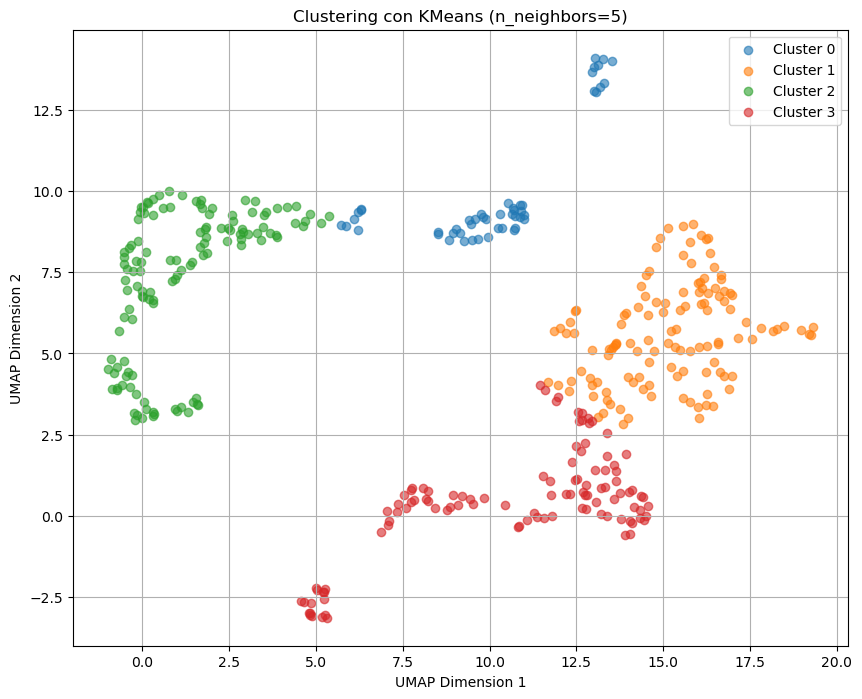

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.36
Silhouette Score: 0.50
Neighbours = 10


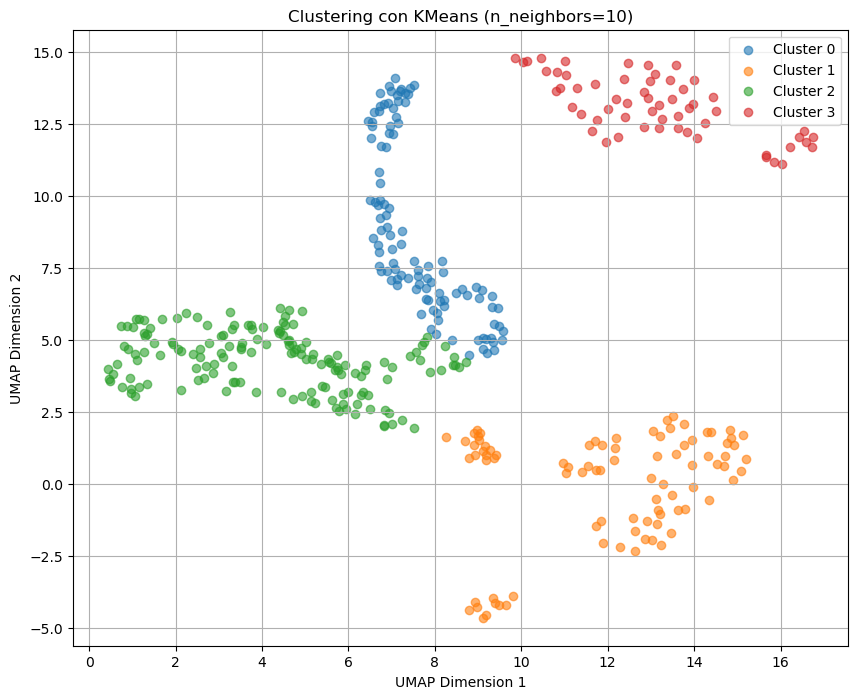

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.58
Silhouette Score: 0.58
Neighbours = 15


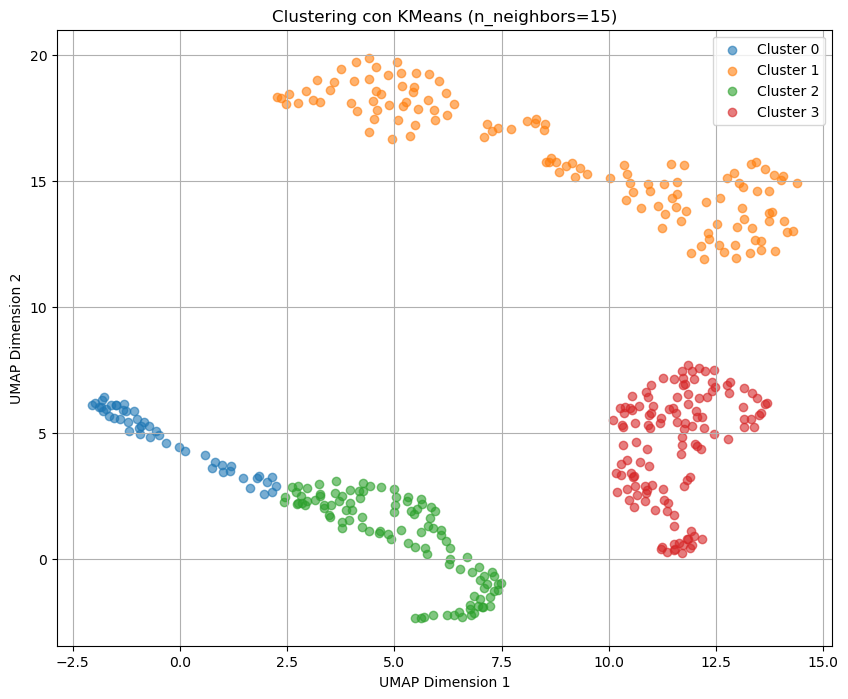

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.30
Silhouette Score: 0.51
Neighbours = 20


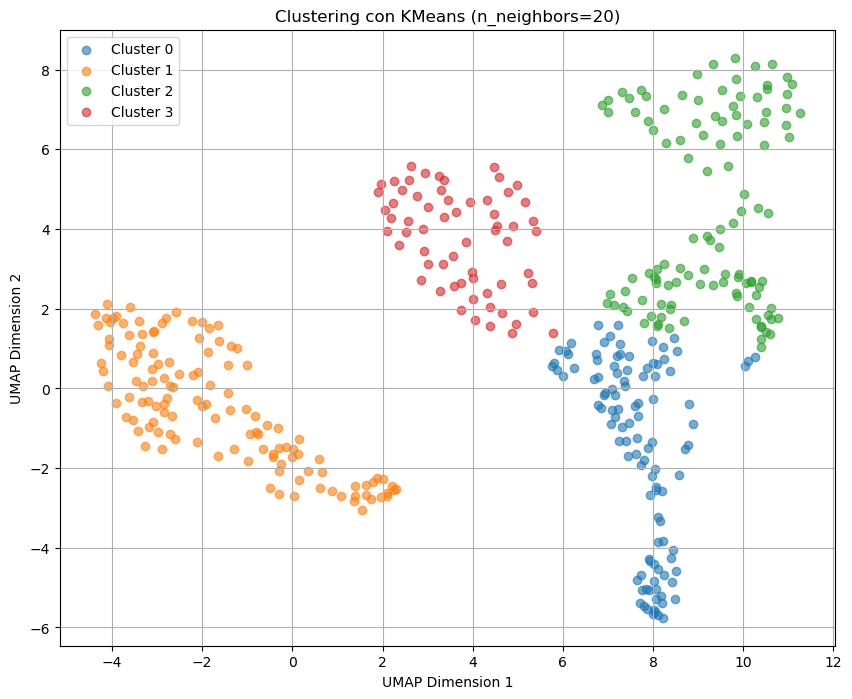

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.52
Silhouette Score: 0.63
Neighbours = 25


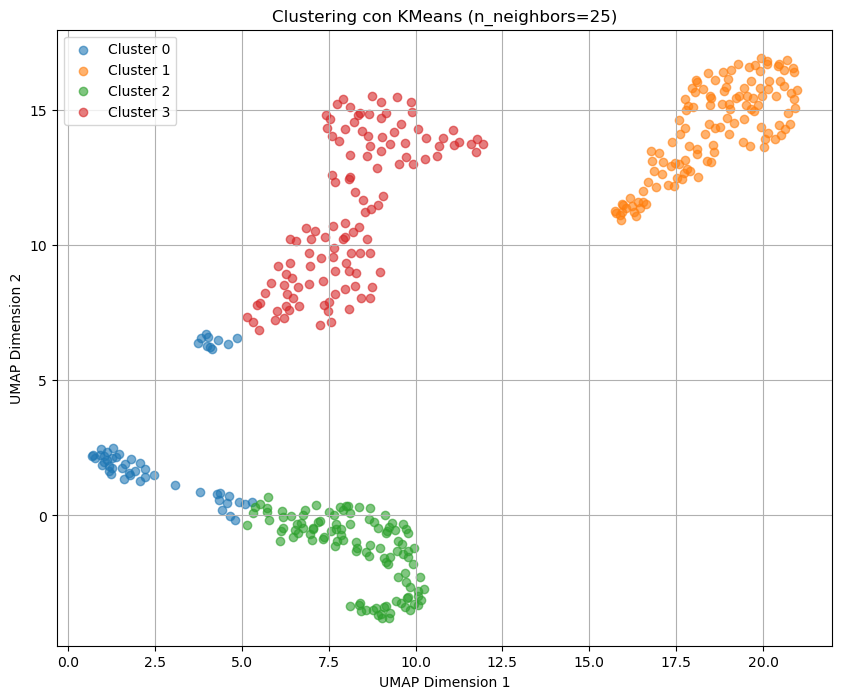

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.74
Neighbours = 30


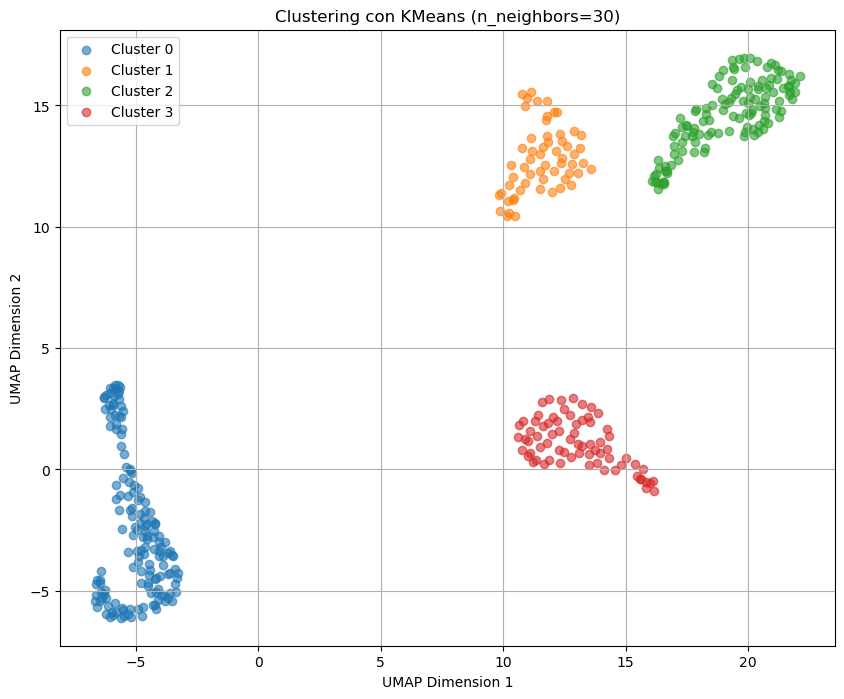

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.74
Neighbours = 35


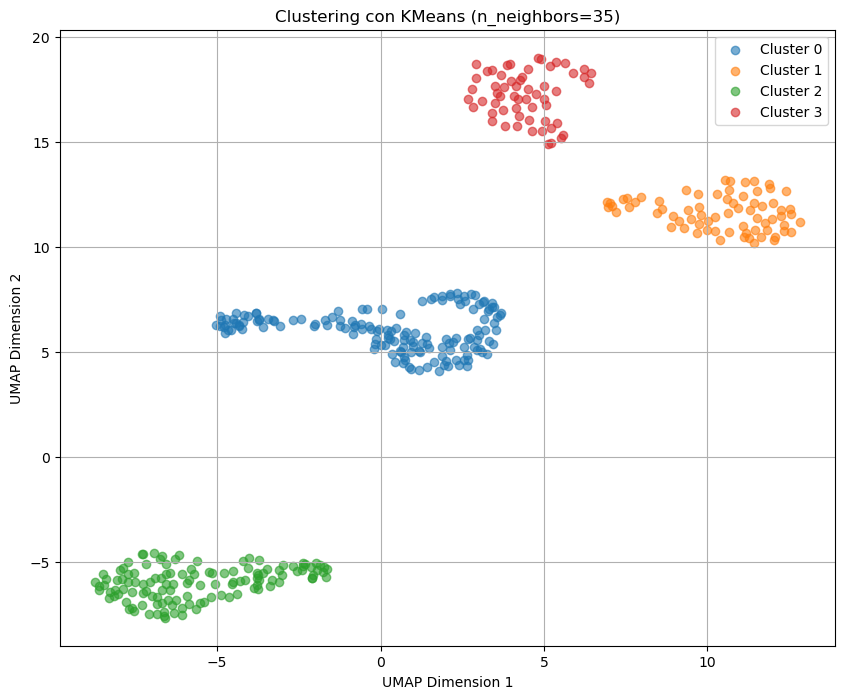

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.77
Neighbours = 40


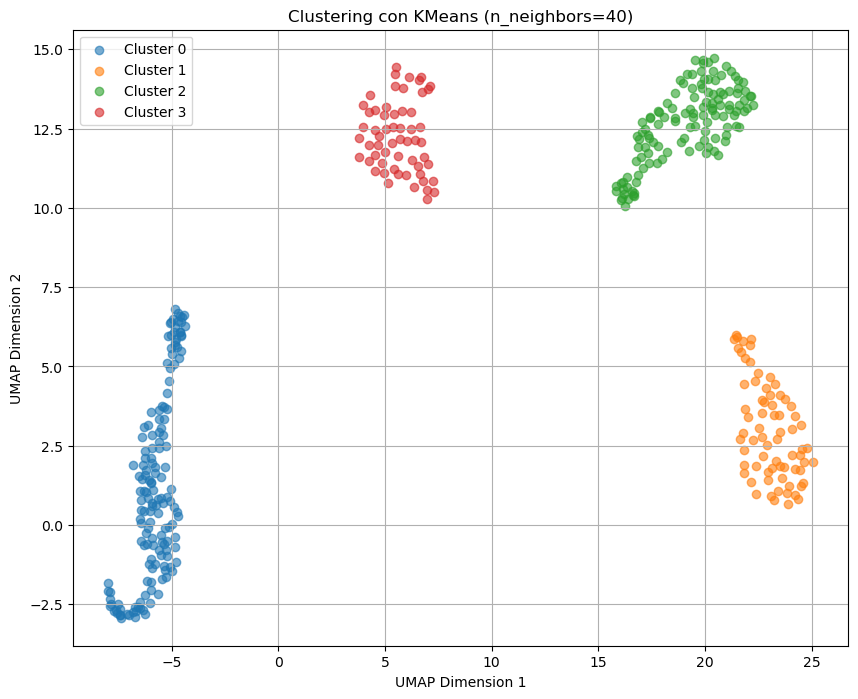

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.39
Silhouette Score: 0.73
Neighbours = 45


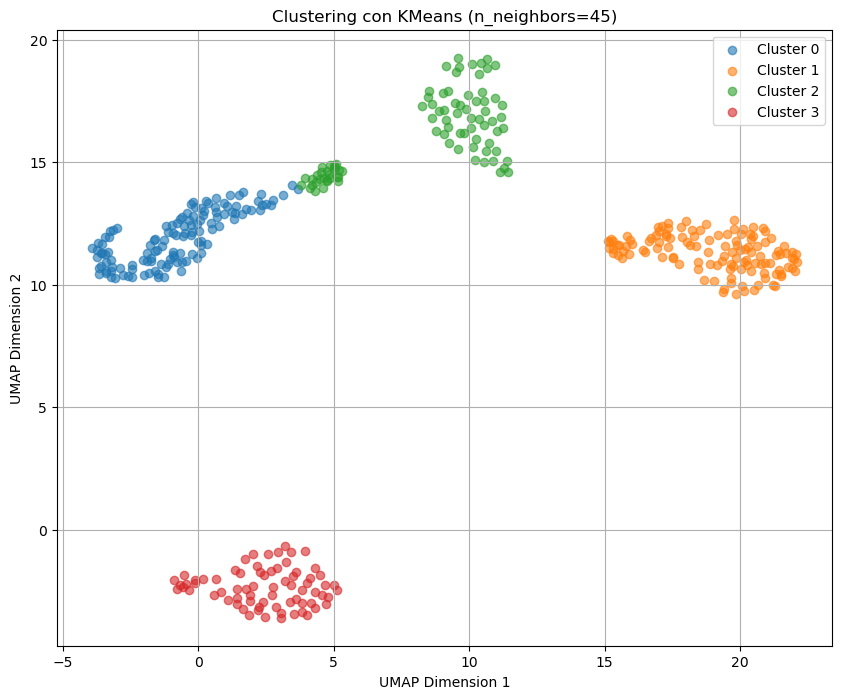

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.80
Neighbours = 50


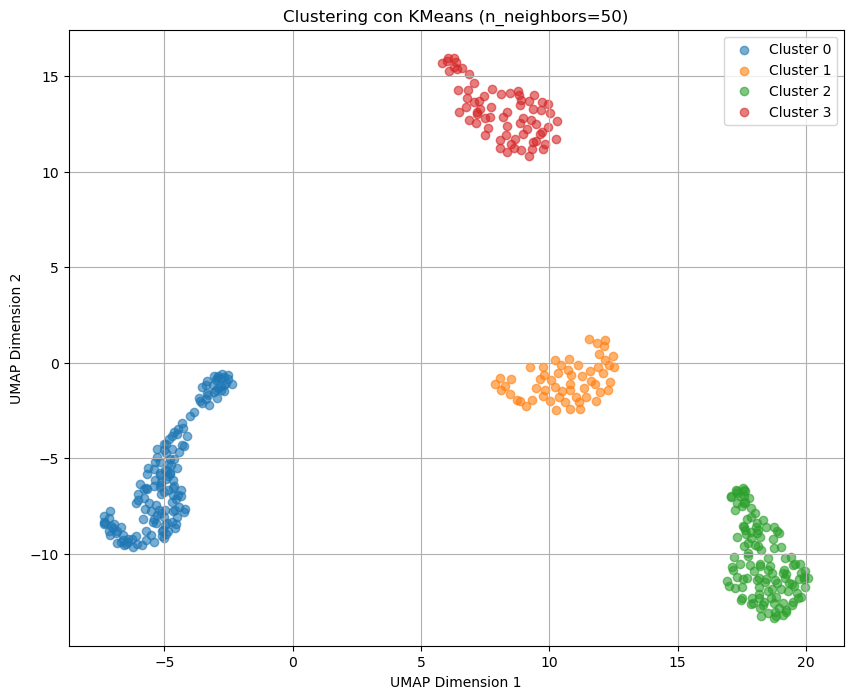

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.36
Silhouette Score: 0.71
Neighbours = 55


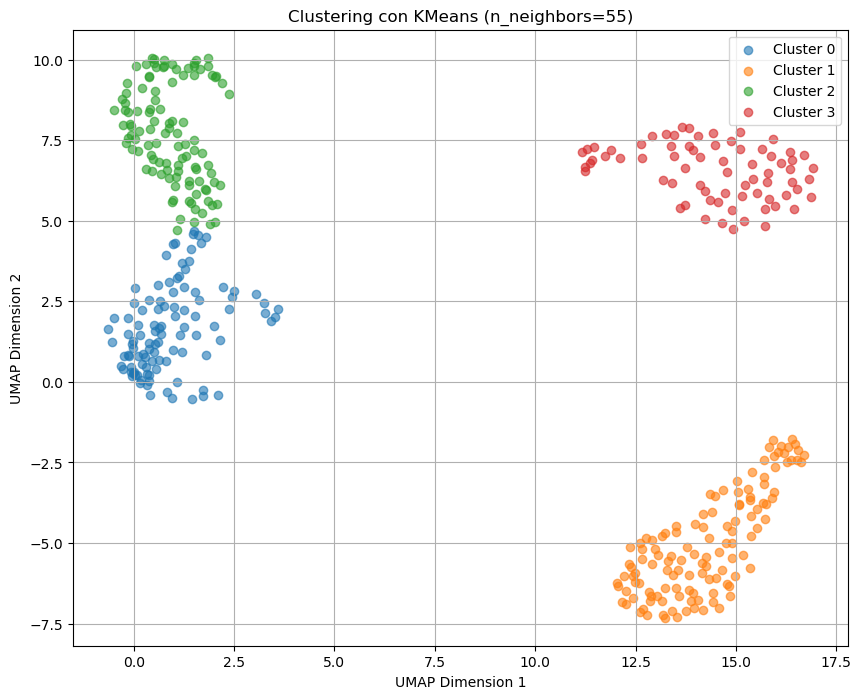

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.82
Neighbours = 60


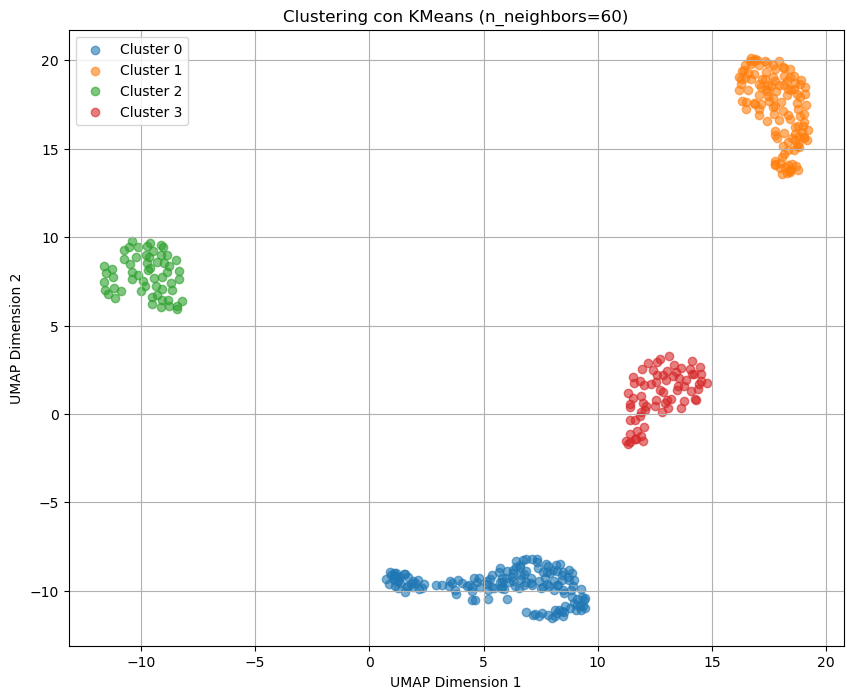

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.78
Neighbours = 65


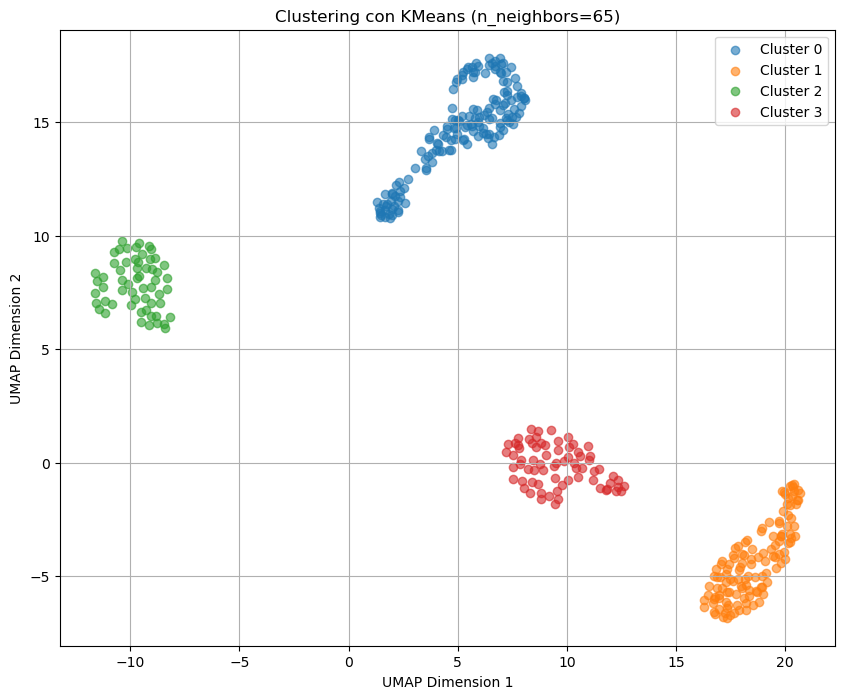

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.78
Neighbours = 70


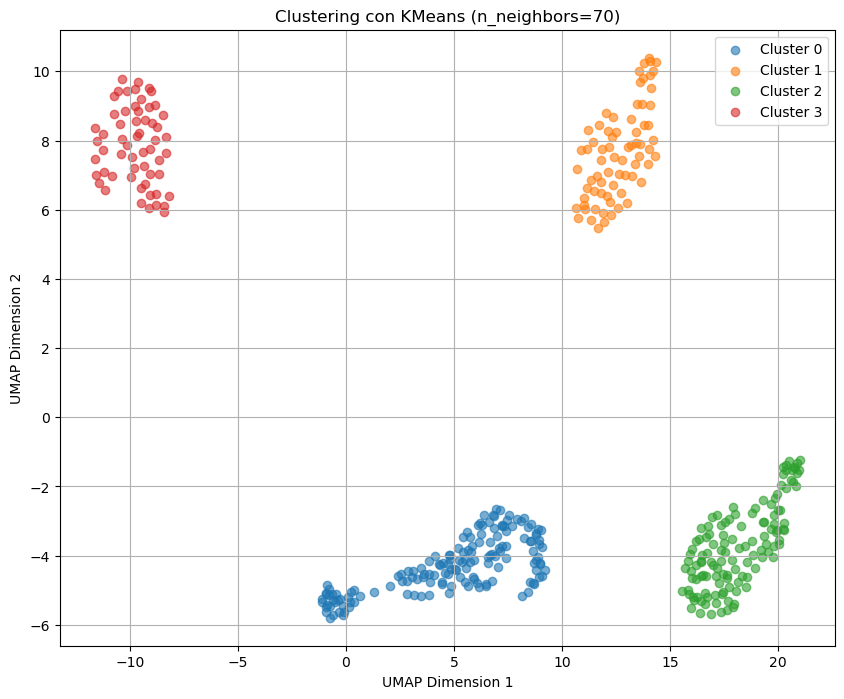

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.79
Neighbours = 75


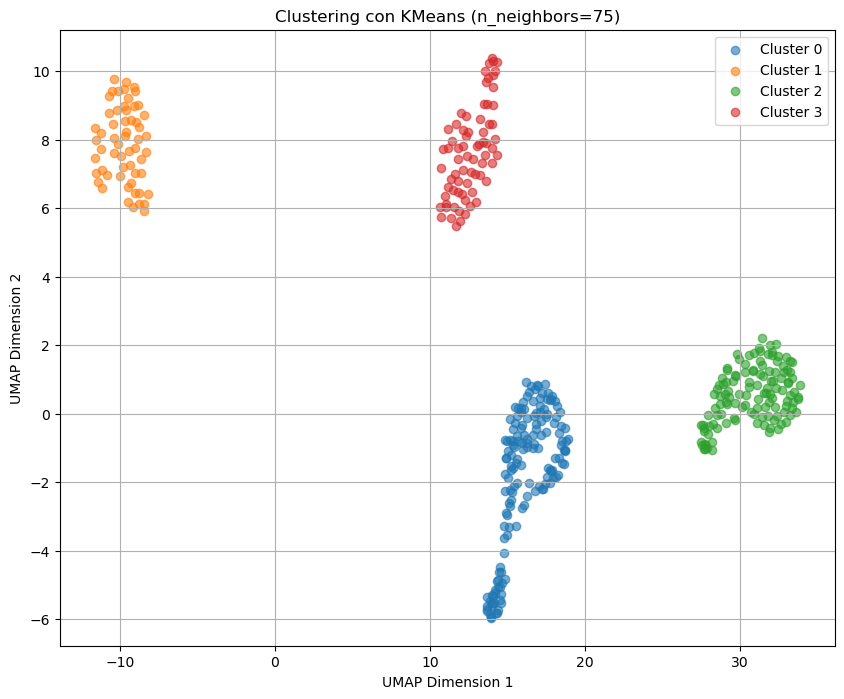

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.17
Silhouette Score: 0.72
Neighbours = 80


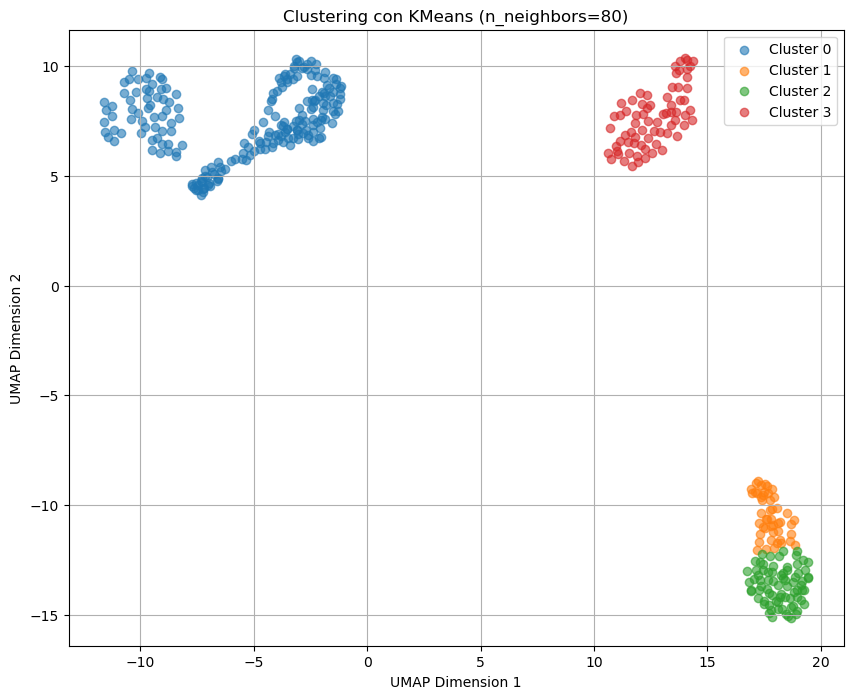

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.82
Neighbours = 85


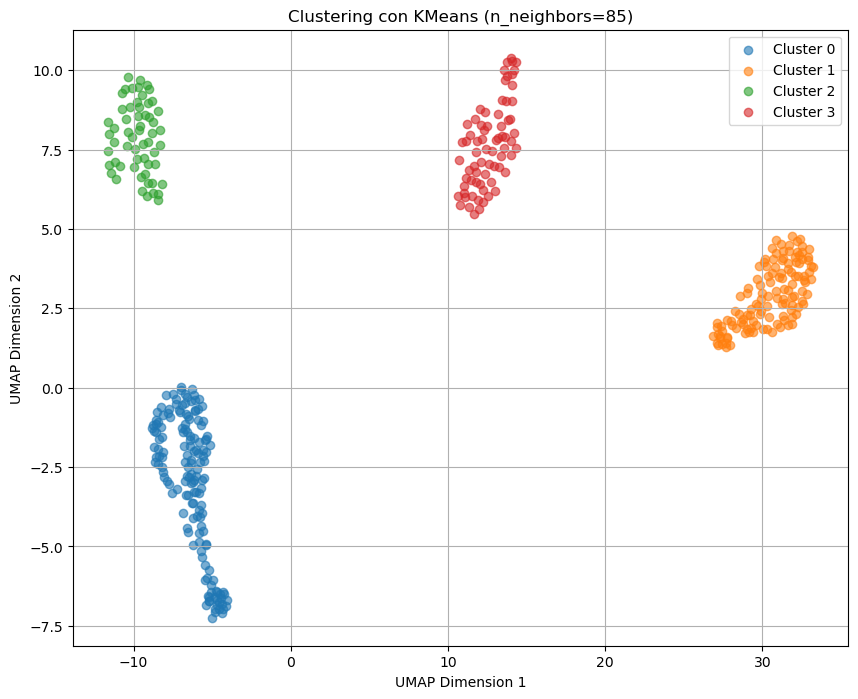

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.79
Neighbours = 90


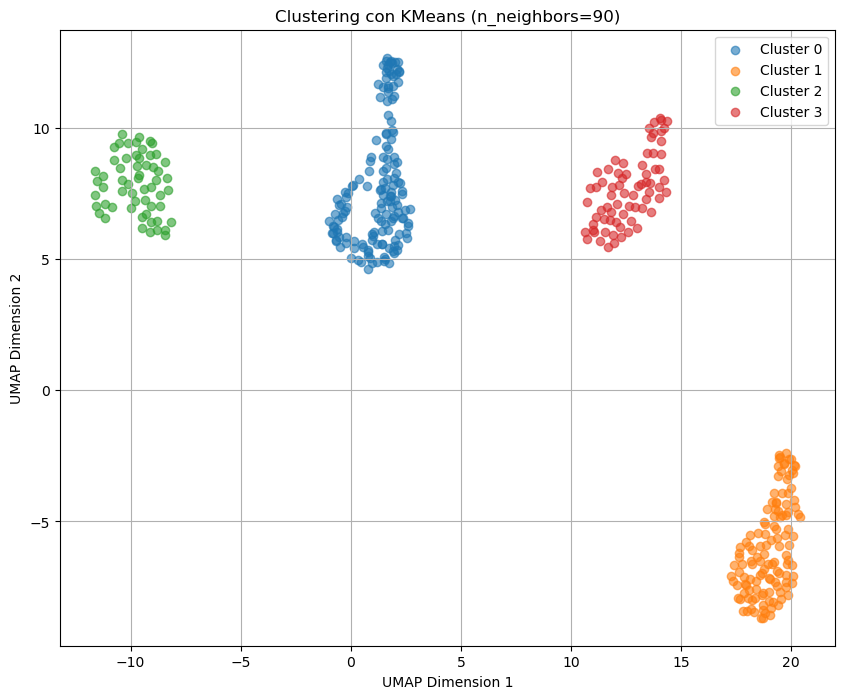

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.73
Neighbours = 95


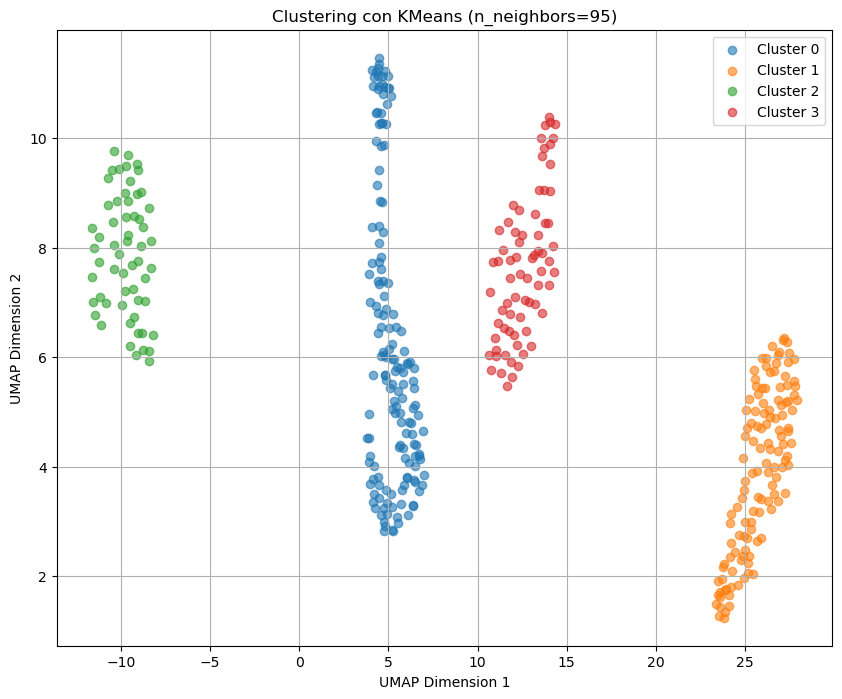

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.77
Neighbours = 100


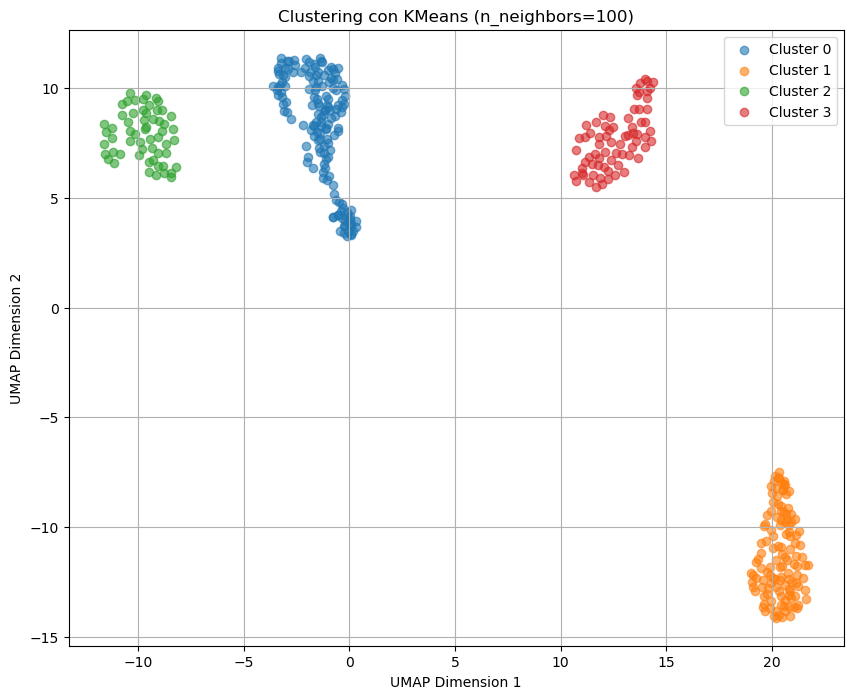

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.77
Neighbours = 105


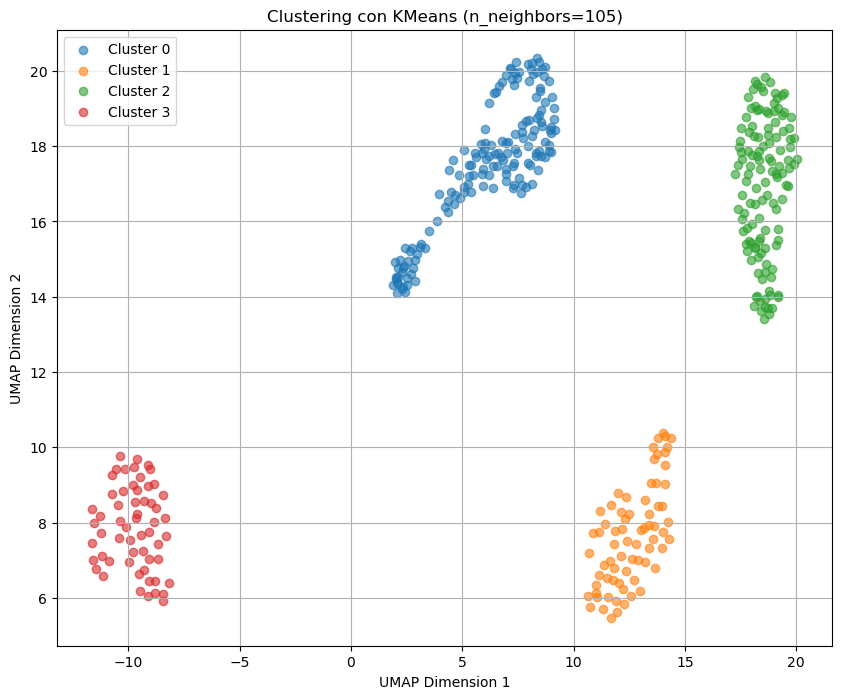

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.37
Silhouette Score: 0.68
Neighbours = 110


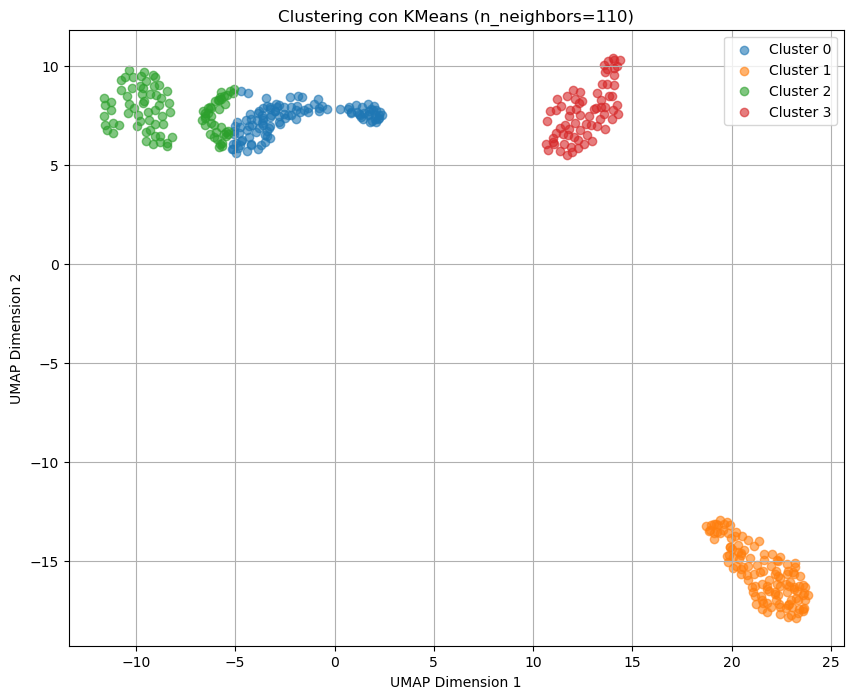

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.42
Silhouette Score: 0.84
Neighbours = 115


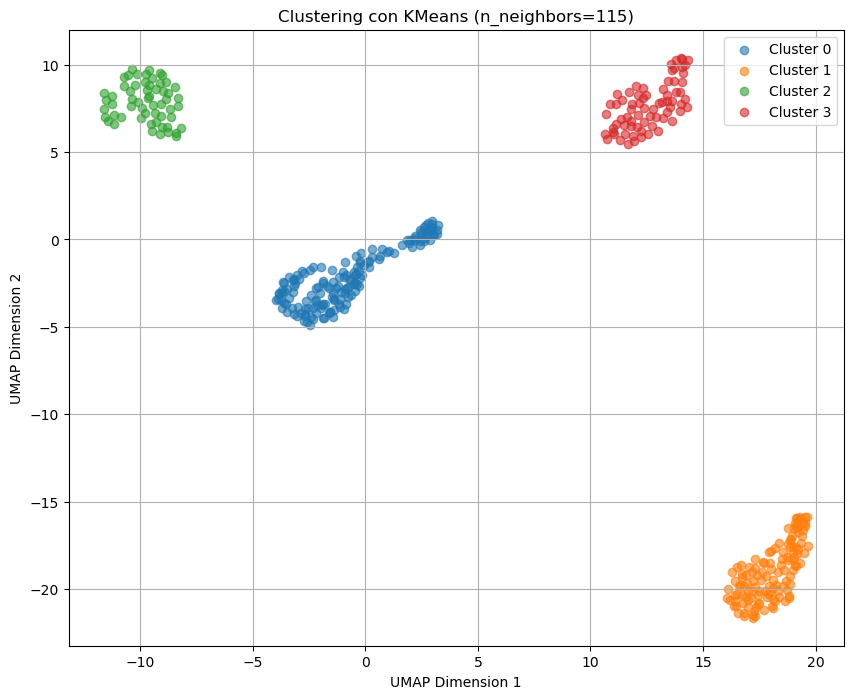

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Nuovo miglior ARI: 0.35
Silhouette Score: 0.67
Neighbours = 120


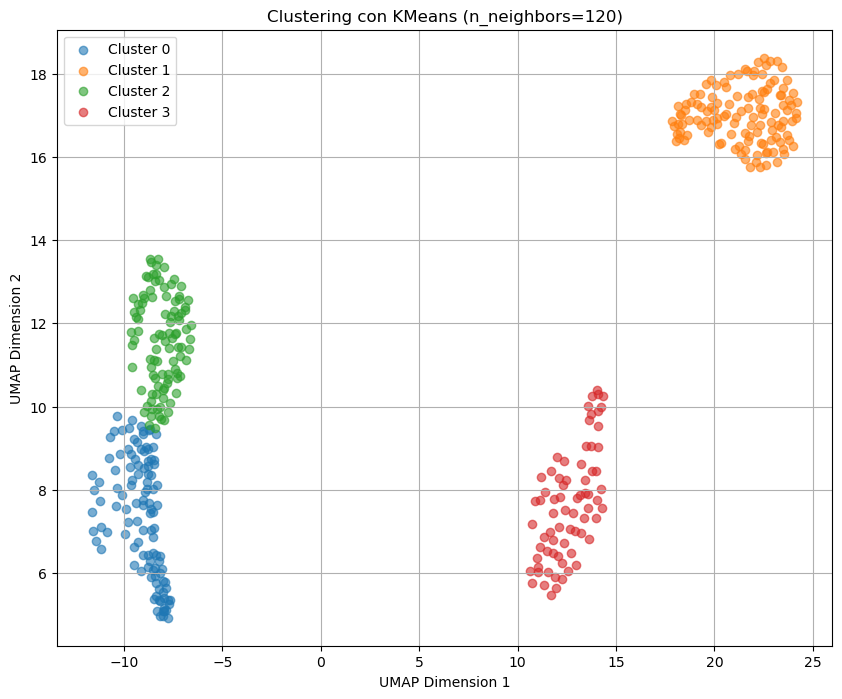


Miglior ARI: -1.00


In [116]:


# VALORI ARS OTTIMO 40,60,41,100,150
# Inizializzazione
max_ari_r = -1
# neighbours = np.linspace(5,150,5).astype(int)
neighbours=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
# Lista con i nomi dei pazienti
patient_names = df_oc_vivi_con_ricorrenza.columns.tolist() + df_op_vivi_con_ricorrenza.columns.tolist() + df_hy_vivi_con_ricorrenza.columns.tolist() + df_la_vivi_con_ricorrenza.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
    op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
    hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
    la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels_r = kmeans.fit_predict(combined_embedding_r)
    
    # Calcolo delle metriche
    score_r = silhouette_score(combined_embedding_r, labels_r) if len(set(labels_r)) > 1 else None
    ari_r = adjusted_rand_score(combined_dataset_r['Type'], labels_r)
    print(f"\nNuovo miglior ARI: {ari_r:.2f}")
    print(f"Silhouette Score: {score_r:.2f}" if score_r is not None else "Silhouette Score non calcolabile.")
    print('Neighbours =', n)
    # if ari_r > max_ari_r:
    #     max_ari_r = ari_r
    #     print(f"\nNuovo miglior ARI: {ari_r:.2f}")
    #     print(f"Silhouette Score: {score_r:.2f}" if score_r is not None else "Silhouette Score non calcolabile.")
    #     print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels_r)
    for label in unique_labels:
        mask = labels_r == label
        plt.scatter(
            combined_embedding_r[mask, 0],
            combined_embedding_r[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari_r:.2f}")


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 0 0 0 2 0 2 2 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 0 0 0 2 0 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 0 2 2 0 0 0 2
 0 2 2 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
ID paziente: 0, Nome: SS_UDUS148, Cluster: 2
ID paziente: 1, Nome: SS_INT_MI_0045, Cluster: 2
ID paziente: 2, Nome: SS_INT_MI_0103, Cluster: 2
ID paziente: 3, Nome: SS_INT_MI

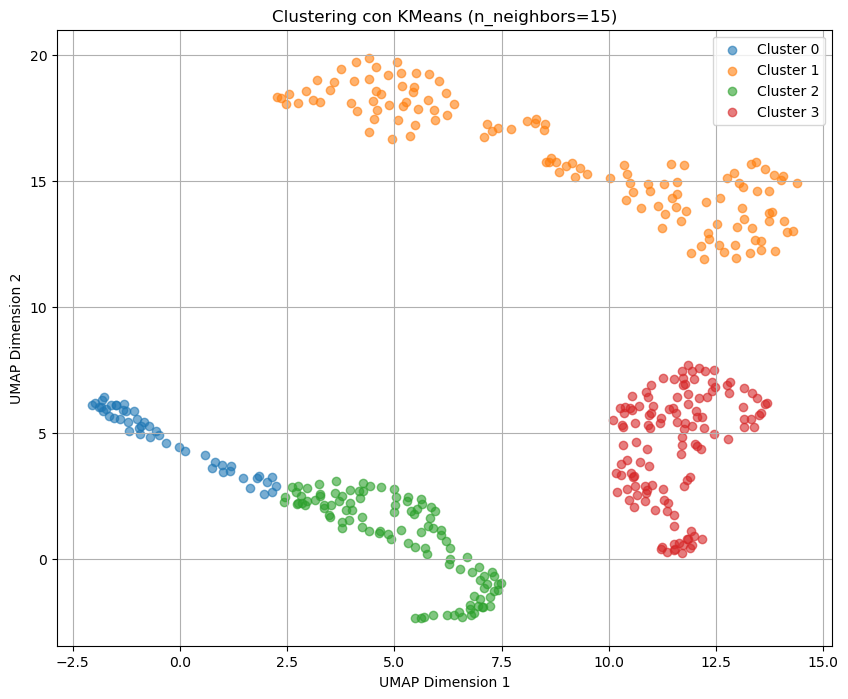


Miglior ARI: 0.58


In [142]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# VALORI ARS OTTIMO 40,60,41,100,150
# Inizializzazione
max_ari_r = -1
neighbours = [15]

# Lista con i nomi dei pazienti
patient_names = df_oc_vivi_con_ricorrenza.columns.tolist() + df_op_vivi_con_ricorrenza.columns.tolist() + df_hy_vivi_con_ricorrenza.columns.tolist() + df_la_vivi_con_ricorrenza.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
    op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
    hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
    la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels_r = kmeans.fit_predict(combined_embedding_r)
    print(labels_r)
    
    # Stampa delle etichette di clustering
    cluster_dict_r = {}
    for idx, label in enumerate(labels_r):
        if label not in cluster_dict_r:
            cluster_dict_r[label] = []
        cluster_dict_r[label].append(patient_names[idx])
        print(f"ID paziente: {idx}, Nome: {patient_names[idx]}, Cluster: {label}")
        
    print(f"\nClustering con n_neighbors={n}")
    for cluster_id, patients in cluster_dict_r.items():
        print(f"Cluster {cluster_id}: {patients}")
    
    # Calcolo delle metriche
    score_r = silhouette_score(combined_embedding_r, labels_r) if len(set(labels_r)) > 1 else None
    ari_r = adjusted_rand_score(combined_dataset_r['Type'], labels_r)
    
    if ari_r > max_ari_r:
        max_ari_r = ari_r
        print(f"\nNuovo miglior ARI: {ari_r:.2f}")
        print(f"Silhouette Score: {score_r:.2f}" if score_r is not None else "Silhouette Score non calcolabile.")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels_r)
    for label in unique_labels:
        mask = labels_r == label
        plt.scatter(
            combined_embedding_r[mask, 0],
            combined_embedding_r[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari_r:.2f}")


In [120]:
combined_dataset_r

,0,1,2,3,4,5,6,7,8,9,...,26895,26896,26897,26898,26899,26900,26901,26902,26903,Type
0,0.470039,-0.595321,-0.754242,-0.636522,0.216943,0.063907,-0.748356,-0.265707,1.812039,-0.395198,...,-0.995566,-1.207461,-0.189189,-0.448172,-1.019110,-0.518803,-0.159759,-0.936707,-0.866075,la
1,-0.050012,0.393015,-0.668721,-1.111748,-0.187503,0.148586,-0.676360,-0.103481,1.584603,-0.966618,...,1.088108,-0.531230,-0.974257,-1.432560,-0.913150,0.003457,-0.225695,-0.347909,-0.653444,la
2,0.318561,-0.623597,-0.345851,-0.852329,-0.051767,-0.367635,-0.737963,-0.362189,1.576588,-0.275053,...,-0.541907,-0.144349,-0.411203,-0.177025,-0.885005,-0.296837,0.095275,-0.748855,-0.759747,la
3,-0.185007,-0.790678,-0.499270,-0.847817,-0.065016,0.294958,-1.007805,-0.202149,1.883415,-0.533554,...,-0.853531,-0.807820,-0.544981,-0.539268,-0.819247,-0.322140,-0.167866,-0.316427,-1.030661,la
4,0.447342,-0.274711,-0.301856,-1.007622,0.621069,-0.372433,-0.687313,-0.285569,1.799156,-0.470154,...,-0.861040,-0.817608,-0.551589,-0.459296,-0.828466,-0.155274,0.203038,-0.899043,-1.110772,la
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.066772,-0.993678,-0.619402,-0.719209,-0.107890,-0.413549,-0.887633,-0.344932,1.813396,-0.076700,...,-0.606926,-0.631877,-0.581974,-0.444739,-0.669305,0.416097,-0.450977,-0.974964,-0.513357,oc
403,0.019467,-0.670456,-0.720531,-0.965342,-0.180833,-0.269855,-0.531358,-0.280983,2.656753,-0.603689,...,-0.948650,-0.904139,-0.570306,-0.881884,-1.020981,-0.531358,-0.019480,-0.720531,-1.176770,oc
404,0.096339,0.595309,-0.838238,-0.608554,0.112180,1.434845,-0.759037,-0.149185,1.664529,-0.275908,...,-0.561033,-0.426390,0.262663,0.088419,-1.115444,-0.568953,-0.093744,-0.822398,-0.497672,oc
405,0.444423,-0.354986,-0.924057,-0.659845,0.180211,0.159887,-0.307564,0.146338,1.582564,-0.720817,...,-1.344085,-1.100198,-0.321113,-0.205944,-0.869860,0.356352,-0.205944,-0.666620,-1.201818,oc


In [148]:
Cluster_2= ['SS_UDUS148', 'SS_INT_MI_0045', 'SS_INT_MI_0103', 'SS_INT_MI_0055', 'SS_INT_0105', 'SS_INT_0148', 'SS_INT_0157', 'SS_INT_0016', 'SS_INT_0069', 'SS_INT_0272', 'SS_INT_0247', 'SS_INT_0182', 'SS_INT_0356', 'SS_INT_0269', 'SS_INT_0309', 'SS_INT_0327', 'SS_INT_0328', 'SS_INT_0531', 'SS_INT_0530', 'SS_INT_0532', 'SS_INT_0165', 'SS_AOP_PR16', 'SS_AOP_PR16_9745', 'SS_AOP_PRX8', 'SS_AOP_PR21', 'SS_AOP_PR21_122', 'SS_AOP_PR22', 'SS_AOP_PR17_3965', 'SS_AOP_PR18_5300', 'SS_AOP_PR19_2030', 'SS_AOP_PR_A_1043', 'SS_AOP_PR19_3106', 'SS_SBA0075', 'SS_SBA_0050', 'SS_SBA_0088', 'SS_91', 'SS_163', 'SS_226', 'SS_232', 'SS_251', 'SS_257', 'SS_297', 'SS_302', 'SS_308', 'SS_PR135', 'SS_INT_MI_0108', 'SS_INT_MI_0153', 'SS_INT_MI_0092', 'SS_INT_MI_0100', 'SS_INT_MI_0243', 'SS_INT_MI_0041', 'SS_INT_MI_0087', 'SS_INT_MI_0235', 'SS_INT_MI_0009', 'SS_INT_MI_0185', 'SS_INT_MI_0107', 'SS_INT_MI_0093', 'SS_INT_MI_0049', 'SS_INT_MI_0051', 'SS_INT_0014', 'SS_INT_0035', 'SS_INT_0084', 'SS_INT_0155', 'SS_INT_0139', 'SS_INT_0202', 'SS_INT_0040', 'SS_INT_0367', 'SS_INT_0374', 'SS_INT_0419', 'SS_INT_0497', 'SS_INT_0470', 'SS_INT_0355', 'SS_INT_0490', 'SS_INT_0383', 'SS_INT_0408', 'SS_INT_0519', 'SS_INT_0424', 'SS_INT_0535', 'SS_UDUS58', 'SS_UDUS4', 'SS_UDUS78', 'SS_UDUS64', 'SS_UDUS67', 'SS_MAASTRO_3946', 'SS_MAASTRO_2835', 'SS_VUMC_011', 'SS_VUMC_064', 'SS_VUMC_068', 'SS_VUMC_077', 'SS_VUMC_088', 'SS_VUMC_116', 'SS_VUMC_119', 'SS_VUMC051', 'SS_VUMC_138', 'SS_VUMC_147', 'SS_VUMC_OC_4275', 'SS_VUMC_OC_1860', 'SS_VUMC_OC_3383', 'SS_VUMC_OC_3744', 'SS_VUMC_OC_6758', 'SS_VUMC_OC_8636', 'SS_VUMC_OC_8033', 'SS_VUMC_OC_2801', 'SS_VUMC_218', 'SS_VUMC_110', 'SS_VUMC_166']
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (ORAL CAVITY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
c_to_keep = [col for col in Cluster_0 if col in df_oc_vivi_con_ricorrenza.columns]
# Filtra il DataFrame usando solo le colonne disponibili
boh = df_oc_vivi_con_ricorrenza[c_to_keep]
len(boh.T)

154

______________________________


COEFFICIENTE DI VARIAZIONE

In [162]:
scaler = StandardScaler()
# APPLICO LA STANDARDIZATION Z-SCORE
df_oc_features = scaler.fit_transform(df_genomica_oc.T)
# df_op = scaler.fit_transform(df_genomica_op)
# df_la = scaler.fit_transform(df_genomica_la)
# df_hy = scaler.fit_transform(df_genomica_hy)

df_oc_features = pd.DataFrame(df_oc_features, columns=df_genomica_oc.T.columns)
# df_op = pd.DataFrame(df_op, columns=df_genomica_op.columns)
# df_la = pd.DataFrame(df_la, columns=df_genomica_la.columns)
# df_hy = pd.DataFrame(df_hy, columns=df_genomica_hy.columns)

df_oc_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
count,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,...,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02
mean,2.732857e-15,-9.272192e-16,2.288767e-15,5.260749e-15,6.685739e-16,-3.572234e-15,3.181826e-15,-3.318469e-16,5.465713e-16,5.426673e-15,...,-5.075305e-16,-1.327388e-15,-5.165587e-15,3.362390e-15,8.515777e-16,-6.227009e-15,4.016323e-15,4.880101e-15,-4.982583e-15,3.733277e-15
std,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,...,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00
min,-1.865193e+00,-2.145487e+00,-2.015935e+00,-2.074246e+00,-2.265326e+00,-2.381590e+00,-2.328447e+00,-1.796129e+00,-2.813363e+00,-1.986256e+00,...,-2.876605e+00,-1.967164e+00,-2.022227e+00,-1.946679e+00,-2.107658e+00,-2.110284e+00,-2.319134e+00,-2.500572e+00,-1.923447e+00,-1.982902e+00
25%,-7.493309e-01,-6.697477e-01,-6.705922e-01,-6.325873e-01,-6.918016e-01,-7.188208e-01,-7.719825e-01,-7.255621e-01,-7.633123e-01,-6.966439e-01,...,-6.480295e-01,-7.399693e-01,-6.252938e-01,-7.138469e-01,-7.373644e-01,-6.828701e-01,-6.773615e-01,-6.910739e-01,-7.584651e-01,-6.734913e-01
50%,-2.411165e-01,-1.260545e-01,-1.976203e-01,-1.424232e-01,-1.038914e-01,-1.070474e-01,-9.851247e-02,-2.209337e-01,-1.212635e-01,-1.536495e-01,...,5.462647e-03,-1.468251e-01,-1.706058e-01,-1.084779e-01,-7.431934e-02,-1.313692e-01,-8.113905e-02,-7.768472e-02,-1.177250e-01,-1.642759e-01
75%,6.123522e-01,5.729797e-01,5.065824e-01,4.822957e-01,5.704762e-01,6.615909e-01,6.048896e-01,4.676248e-01,6.521988e-01,5.759992e-01,...,6.980526e-01,5.894918e-01,5.251216e-01,6.029411e-01,5.666242e-01,5.255658e-01,6.014925e-01,5.970433e-01,6.006804e-01,5.527825e-01
max,4.067657e+00,5.679813e+00,3.491561e+00,4.134498e+00,5.394798e+00,3.673398e+00,3.208974e+00,3.240723e+00,3.899990e+00,3.036442e+00,...,2.842847e+00,4.311983e+00,5.822511e+00,3.691648e+00,4.080763e+00,4.540168e+00,4.196109e+00,3.878675e+00,3.241306e+00,4.584937e+00


In [ ]:
#COEFFICIENTE DI VARIAZIONE
# Coefficiente di variazione
cv = variation(data)  # Deviazione standard / media
df_genomica_oc

________________________________________________________________________________
patho_HPV_Status_Evaluated

C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ID paziente: 0, Nome: SS_UDUS148, Cluster: 0
ID paziente: 1, Nome: SS_INT_MI_0045, Cluster: 0
ID paziente: 2, Nome: SS_INT_MI_0103, Cluster: 0
ID paziente: 3, Nome: SS_INT_MI

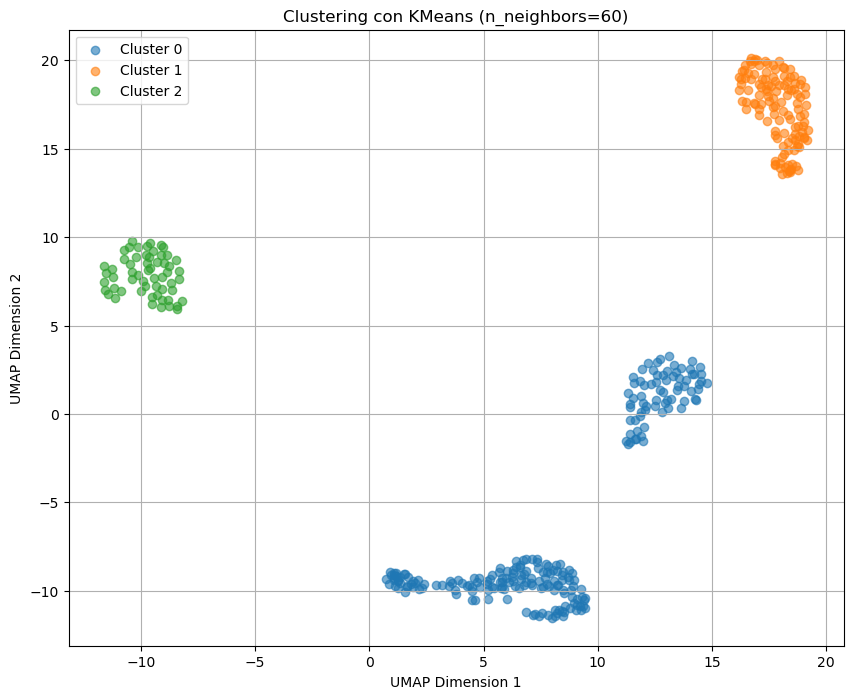


Miglior ARI: 0.38


In [253]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# VALORI ARS OTTIMO 40,60,41,100,150
# Inizializzazione
max_ari_r = -1
neighbours = [60]

# Lista con i nomi dei pazienti
patient_names = df_oc_vivi_con_ricorrenza.columns.tolist() + df_op_vivi_con_ricorrenza.columns.tolist() + df_hy_vivi_con_ricorrenza.columns.tolist() + df_la_vivi_con_ricorrenza.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
    op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
    hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
    la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels_r = kmeans.fit_predict(combined_embedding_r)
    print(labels_r)
    
    # Stampa delle etichette di clustering
    cluster_dict_r = {}
    for idx, label in enumerate(labels_r):
        if label not in cluster_dict_r:
            cluster_dict_r[label] = []
        cluster_dict_r[label].append(patient_names[idx])
        print(f"ID paziente: {idx}, Nome: {patient_names[idx]}, Cluster: {label}")
        
    print(f"\nClustering con n_neighbors={n}")
    for cluster_id, patients in cluster_dict_r.items():
        print(f"Cluster {cluster_id}: {patients}")
    
    # Calcolo delle metriche
    score_r = silhouette_score(combined_embedding_r, labels_r) if len(set(labels_r)) > 1 else None
    ari_r = adjusted_rand_score(combined_dataset_r['patho_HPV_Status_Evaluated'], labels_r)
    
    if ari_r > max_ari_r:
        max_ari_r = ari_r
        print(f"\nNuovo miglior ARI: {ari_r:.2f}")
        print(f"Silhouette Score: {score_r:.2f}" if score_r is not None else "Silhouette Score non calcolabile.")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels_r)
    for label in unique_labels:
        mask = labels_r == label
        plt.scatter(
            combined_embedding_r[mask, 0],
            combined_embedding_r[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari_r:.2f}")


In [259]:
combined_dataset_r['patho_HPV_Status_Evaluated'].unique()

array(['Negative', 'Not available', 'Positive'], dtype=object)